In [1]:
print("test")

test


### Set working directory and import packages

In [2]:
## Set path
import os
from pathlib import Path

current_directory = Path.cwd()
if current_directory.name == "MT":
    # This means that the notebook is run from the main anomalib directory.
    root_directory = current_directory.parent
elif current_directory.name == "anomalib":
    # This means that the notebook is run from the main anomalib directory.
    root_directory = current_directory
    print("here")

os.chdir(root_directory)
root_directory

PosixPath('/home/wueesmat/MT/anomalib')

In [3]:
os.getcwd()

'/home/wueesmat/MT/anomalib'

In [4]:
# Import the required modules
import numpy as np
from MT.refinement import train_and_evaluate_model_blind, train_and_evaluate_model_SRR_light

Could not find wandb. To use this feature, ensure that you have wandb installed.
Could not find openvino. To use this feature, ensure that you have openvino installed.
OpenVINO is not installed. Please install OpenVINO to use OpenVINOInferencer.


In [12]:
## Import the required modules
#import numpy as np
import matplotlib.pyplot as plt
#import torch
#from lightning.pytorch import Trainer, seed_everything
#from anomalib.data import MVTec
#from anomalib.data.image.mvtec import MVTec_contaminated, MVTecDataset_contaminated, make_mvtec_dataset, make_mvtec_dataset_contaminated
#from anomalib.models import Padim, Patchcore, Stfpm, Draem, EfficientAd
#from anomalib.engine import Engine
#from anomalib import TaskType
#
#from anomalib.data.utils import Split



### Define Experiment

In [6]:
# #Define experiment
# run_arr = np.array([1]) #np.array([1, 2, 3, 4, 5]) #np.array([1, 2]) #np.array([1]) #np.array([1]) #np.array([42])#np.arange(3)+1
# cont_ratio_arr = np.array([0.15]) #np.array([0.0, 0.05, 0.1, 0.15]) #np.array([0.0, 0.15])#np.array([0.15])#, 0.1]) #, 0.15
# category_arr = np.array(["screw"])#np.array(["wood", "cable", "metal_nut", "screw"])#, "carpet", "grid", "leather", "tile", "wood", "bottle", "cable", "capsule", "hazelnut", "metal_nut", "pill", "screw", "toothbrush", "transistor", "zipper"])#np.array(["carpet", "grid"])#np.array(["metal_nut"])#, "grid"])# #
# results_blind_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]])
# results_refined_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]])

In [7]:
# #Define experiment
# run_arr = np.array([1, 2, 3, 4, 5]) #np.array([1, 2]) #np.array([1]) #np.array([1]) #np.array([42])#np.arange(3)+1
# cont_ratio_arr = np.array([0.15]) #np.array([0.0, 0.05, 0.1, 0.15]) #np.array([0.0, 0.15])#np.array([0.15])#, 0.1]) #, 0.15
# category_arr = np.array(["wood", "cable", "metal_nut", "screw"])#, "carpet", "grid", "leather", "tile", "wood", "bottle", "cable", "capsule", "hazelnut", "metal_nut", "pill", "screw", "toothbrush", "transistor", "zipper"])#np.array(["carpet", "grid"])#np.array(["metal_nut"])#, "grid"])# #
# results_blind_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]])
# results_refined_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]])


In [8]:
# from pathlib import Path
# import pandas as pd

### Run Experiment (SRR light)

In [9]:
# # Define path
# save_folder = "./results/Patchcore/"
# name = "20240411_Patchcore_cont_max_0.15_sampling_ratio_0.01_SRR.pickle"
# target_path = os.path.join(save_folder, name)

In [10]:
# # Save blind training results
# #predictions_train_blind_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)
# #predictions_test_blind_arr  = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)
# results_test_blind_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)
# 
# # Save refined training results
# #predictions_train_refined_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)
# #predictions_train_refined_unselected_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)
# #predictions_test_refined_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)
# results_test_refined_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)

In [5]:
run_arr = np.array([1])#np.array([1, 2, 3])#, 4, 5]) # np.array([1, 2])#, 2])#
category_arr = np.array(["cable"])#np.array(["cable", "wood", "metal_nut"])


In [6]:
# Initialize arrays for saving
results_test_blind_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
results_test_refined_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
keep_indices_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
train_dataset_length_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
abnormal_total_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
abnormal_excluded_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
normal_total_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
normal_excluded_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
k_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)

In [ ]:
#cont_ratio = 0.15
#k=2
#gamma = gamma = 1-cont_ratio
#coreset_sampling_ratio = 0.01
#run = 3
#category = "cable"
#
#results_test_refined, keep_indices, abnormal_total, abnormal_excluded, normal_total, normal_excluded = train_and_evaluate_model_SRR_light(k, gamma, coreset_sampling_ratio, run, category, cont_ratio)

In [7]:
# Loop over experiments
for idx_category, category in enumerate(category_arr):
    for idx_run, run in enumerate(run_arr):

        print("+---------------------+")
        print("| category: ", category, " |")
        print("| run: ", run, "       |")
        print("+---------------------+")
        

        ## Loop
        cont_ratio = 0.15
        coreset_sampling_ratio = 0.01

        # Define refinement
        k_ls = [1, 2, 3, 5, 10]
        #k_ls = [1, 2, 3, 5, 10]
        #k_ls = [1, 2, 3, 5, 10, 20, 40]
        gamma = 1-cont_ratio

        # Lists to save results
        results_test_blind_ls=[]
        results_test_refined_ls=[]
        keep_indices_ls=[]
        train_dataset_length_ls=[]
        abnormal_total_ls=[]
        abnormal_excluded_ls=[]
        normal_total_ls=[]
        normal_excluded_ls=[]

        # Evaluate Blind
        results_test_blind = train_and_evaluate_model_blind(coreset_sampling_ratio, run, category, cont_ratio)

        # Evaluate SRR Light
        for k in k_ls:
            results_test_refined, keep_indices, abnormal_total, abnormal_excluded, normal_total, normal_excluded = train_and_evaluate_model_SRR_light(k, gamma, coreset_sampling_ratio, run, category, cont_ratio)

            ## Save results
            results_test_blind_ls.append(results_test_blind)
            results_test_refined_ls.append(results_test_refined)
            keep_indices_ls.append(keep_indices)
            abnormal_total_ls.append(abnormal_total)
            abnormal_excluded_ls.append(abnormal_excluded)
            normal_total_ls.append(normal_total)
            normal_excluded_ls.append(normal_excluded)


        ## Save results in array
        results_test_blind_arr[idx_run, idx_category] = results_test_blind_ls
        results_test_refined_arr[idx_run, idx_category] = results_test_refined_ls
        keep_indices_arr[idx_run, idx_category] = keep_indices_ls
        abnormal_total_arr[idx_run, idx_category] = abnormal_total_ls
        abnormal_excluded_arr[idx_run, idx_category] = abnormal_excluded_ls
        normal_total_arr[idx_run, idx_category] = normal_total_ls
        normal_excluded_arr[idx_run, idx_category] = normal_excluded_ls
        k_arr[idx_run, idx_category] = k_ls


## Save arrays in dict
results_dict = {
    "dimensions": {
        "run_arr": run_arr,
        "category_arr": category_arr
        
    },
    "results": {
        "results_test_blind_arr": results_test_blind_arr,
        "results_test_refined_arr": results_test_refined_arr,
        "keep_indices_arr": keep_indices_arr,
        "abnormal_total_arr": abnormal_total_arr,
        "abnormal_excluded_arr": abnormal_excluded_arr,
        "normal_total_arr": normal_total_arr,
        "normal_excluded_arr":   normal_excluded_arr,
        "k_arr": k_arr
    }
}



Seed set to 1


+---------------------+
| category:  cable  |
| run:  1        |
+---------------------+


/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wue

Training: |                                                                                                   …

/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/loops/optimization/automatic.py:129: `training_step` returned `None`. If this was on purpose, ignore this warning...


Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
Restoring states from the checkpoint path at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v755/weights/lightning/model.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from the checkpoint at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v755/weights/lightning/model.ckpt


Testing: |                                                                                                    …

Seed set to 1
Seed set to 1


k:  1
train_dataset_length: 263
indices_disjoint_datasets:  [array([ 95,  12, 164, 176,  51, 257, 224, 167,  78, 123, 174,  73, 192,
        44, 138,  38, 112,   4, 240, 251, 239,  34,  88, 180, 256, 108,
        62, 190,  90,  58, 262,  93,  27, 130,  39, 205,  91, 182, 163,
        85, 168, 170, 238, 132,  99,  79, 220, 102, 147, 241,  31,  18,
       120, 219, 210,  19, 110, 242,  33, 194, 199,  35,  11, 228,  29,
         0, 177, 122,  67, 260,  28,  16, 171, 150,  47, 208,  40, 107,
       246,  69, 188, 118, 119, 186, 254, 114,  59, 127, 152, 158, 154,
       117, 106,  14, 169, 249,  21,  89,  56, 227,  55, 230, 185,  84,
        53, 259, 140, 247, 187, 116, 148,  42,  17,   5, 195, 183,  48,
       159, 245,  66,  70, 232, 211, 105, 218,  54, 244,  98, 145,  97,
       197,  82, 243,  94, 236, 191,  81, 124, 172, 173,  13, 261, 179,
        45, 189, 103,  36, 213, 248, 258, 181,  75, 161, 229, 221, 202,
         2, 214,   6, 223, 206,  77, 113,  65, 151, 160,  46,  74,  92,
   

/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wue

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

prediction_scores_subset:  [0.42838982 0.42450926 0.40263647 0.43511367 0.39369237 0.39667672
 0.41695967 0.4134975  0.44086757 0.434881   0.42547342 0.40950558
 0.4784649  0.40053982 0.39376765 0.40750527 0.45391276 0.42322385
 0.43475017 0.43288848 0.40677017 0.38563064 0.44501165 0.41549933
 0.43625116 0.41019508 0.41821718 0.4398751  0.4053261  0.46260744
 0.4094539  0.4108001  0.44363686 0.4027844  0.40494007 0.40286416
 0.42769238 0.42001164 0.4327911  0.43281174 0.4246197  0.40137523
 0.4295412  0.42841098 0.45644593 0.4613925  0.41568005 0.41957554
 0.40756193 0.41177243 0.41252044 0.41216418 0.43102583 0.39755446
 0.40496957 0.41573107 0.4030272  0.4061638  0.42628178 0.4004551
 0.45445314 0.42042285 0.41021279 0.4092315  0.43438455 0.40821224
 0.41835898 0.43931332 0.405621   0.46952307 0.41880316 0.42927516
 0.44529238 0.44734967 0.41954553 0.39207453 0.40527847 0.41115165
 0.39506716 0.40419352 0.41114676 0.42793047 0.41846547 0.39974266
 0.42274544 0.39953005 0.42643368 0.

Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model          

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
Restoring states from the checkpoint path at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v757/weights/lightning/model.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from the checkpoint at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v757/weights/lightning/model.ckpt


Testing: |                                                                                                    …

Seed set to 1
Seed set to 1


k:  2
train_dataset_length: 263
indices_disjoint_datasets:  [array([ 95,  12, 164, 176,  51, 257, 224, 167,  78, 123, 174,  73, 192,
        44, 138,  38, 112,   4, 240, 251, 239,  34,  88, 180, 256, 108,
        62, 190,  90,  58, 262,  93,  27, 130,  39, 205,  91, 182, 163,
        85, 168, 170, 238, 132,  99,  79, 220, 102, 147, 241,  31,  18,
       120, 219, 210,  19, 110, 242,  33, 194, 199,  35,  11, 228,  29,
         0, 177, 122,  67, 260,  28,  16, 171, 150,  47, 208,  40, 107,
       246,  69, 188, 118, 119, 186, 254, 114,  59, 127, 152, 158, 154,
       117, 106,  14, 169, 249,  21,  89,  56, 227,  55, 230, 185,  84,
        53, 259, 140, 247, 187, 116, 148,  42,  17,   5, 195, 183,  48,
       159, 245,  66,  70, 232, 211, 105, 218,  54, 244,  98, 145,  97,
       197,  82]), array([243,  94, 236, 191,  81, 124, 172, 173,  13, 261, 179,  45, 189,
       103,  36, 213, 248, 258, 181,  75, 161, 229, 221, 202,   2, 214,
         6, 223, 206,  77, 113,  65, 151, 160,  46,  74,

/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wue

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.43771654 0.43138054 0.46997038 0.46258894 0.39646083 0.4346586
 0.44526798 0.45629844 0.47211775 0.48515084 0.44365913 0.41004667
 0.41009188 0.4515525  0.4071817  0.4176614  0.43424362 0.4468604
 0.45271796 0.3960099  0.4729588  0.41116074 0.43567652 0.4677254
 0.45572543 0.45294356 0.43616623 0.44035876 0.40663028 0.42318064
 0.426349   0.43713006 0.45743877 0.41525698 0.41896075 0.3999359
 0.49375153 0.43739554 0.4352229  0.4098823  0.40842384 0.41251108
 0.42832473 0.49719456 0.41012836 0.42659685 0.48210013 0.42658034
 0.4264154  0.42237237 0.49926692 0.4218835  0.4466253  0.43677747
 0.40389243 0.42211837 0.39651608 0.48319024 0.43857267 0.39506435
 0.5295238  0.4706414  0.4144089  0.45120096 0.46267802 0.4698593
 0.4140825  0.4124744  0.50324917 0.43515548 0.45080027 0.46049494
 0.4859139  0.4326949  0.56715393 0.48182127 0.43697196 0.48463598
 0.4236916  0.42584783 0.51005566 0.47251326 0.4482935  0.42192635
 0.41841155 0.4138945  0.5067342  0.4315

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

prediction_scores_subset:  [0.4753606  0.41749635 0.42566013 0.40963995 0.47397703 0.41991845
 0.4152176  0.42415655 0.42756563 0.4186523  0.40306327 0.4297462
 0.51412076 0.4320728  0.46661842 0.43436104 0.43951538 0.43716174
 0.43999016 0.46741974 0.41915405 0.43185756 0.45753768 0.44374883
 0.41797563 0.4287867  0.42381105 0.49107888 0.4313455  0.4442358
 0.42165196 0.43779582 0.43130207 0.4944011  0.5082265  0.45752385
 0.41656005 0.41883245 0.45871052 0.46224687 0.47243008 0.43952996
 0.4435782  0.43126732 0.4372239  0.41391534 0.42340383 0.42669535
 0.4649422  0.41071174 0.46229562 0.4435687  0.4605011  0.4517123
 0.42883873 0.47242597 0.4536037  0.43905833 0.42114103 0.4277063
 0.40656734 0.43247527 0.41107258 0.40937933 0.40824354 0.41460228
 0.4521442  0.446539   0.43633306 0.46934962 0.4366514  0.41118336
 0.43289292 0.44639602 0.43453023 0.42597264 0.40594018 0.39869085
 0.4394557  0.4694581  0.43351522 0.42516753 0.4936842  0.43227065
 0.4647016  0.44779086 0.43705985 0.425

Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model          

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
Restoring states from the checkpoint path at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v760/weights/lightning/model.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from the checkpoint at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v760/weights/lightning/model.ckpt


Testing: |                                                                                                    …

Seed set to 1
Seed set to 1


k:  3
train_dataset_length: 263
indices_disjoint_datasets:  [array([ 95,  12, 164, 176,  51, 257, 224, 167,  78, 123, 174,  73, 192,
        44, 138,  38, 112,   4, 240, 251, 239,  34,  88, 180, 256, 108,
        62, 190,  90,  58, 262,  93,  27, 130,  39, 205,  91, 182, 163,
        85, 168, 170, 238, 132,  99,  79, 220, 102, 147, 241,  31,  18,
       120, 219, 210,  19, 110, 242,  33, 194, 199,  35,  11, 228,  29,
         0, 177, 122,  67, 260,  28,  16, 171, 150,  47, 208,  40, 107,
       246,  69, 188, 118, 119, 186, 254, 114,  59, 127]), array([152, 158, 154, 117, 106,  14, 169, 249,  21,  89,  56, 227,  55,
       230, 185,  84,  53, 259, 140, 247, 187, 116, 148,  42,  17,   5,
       195, 183,  48, 159, 245,  66,  70, 232, 211, 105, 218,  54, 244,
        98, 145,  97, 197,  82, 243,  94, 236, 191,  81, 124, 172, 173,
        13, 261, 179,  45, 189, 103,  36, 213, 248, 258, 181,  75, 161,
       229, 221, 202,   2, 214,   6, 223, 206,  77, 113,  65, 151, 160,
        46,  74,

/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wue

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.41371143 0.41419315 0.4945324  0.46378767 0.42463118 0.46273232
 0.47675323 0.46936077 0.45899484 0.45307502 0.45130756 0.4113322
 0.42294633 0.4784564  0.44003102 0.4480819  0.42066467 0.45517555
 0.41814643 0.4323405  0.4349453  0.43652    0.44069082 0.45353475
 0.49438956 0.4853963  0.42110702 0.41052085 0.40332776 0.41692224
 0.45202872 0.40706167 0.47752303 0.44014916 0.4477823  0.44735506
 0.5044532  0.43429685 0.41143548 0.4056309  0.43109894 0.43392846
 0.5006944  0.54091126 0.48981035 0.4641135  0.53588724 0.41188994
 0.428496   0.47227985 0.49026462 0.4223233  0.5018121  0.44199365
 0.44159102 0.50398004 0.43262228 0.47079608 0.40483567 0.40653816
 0.49710888 0.4365334  0.4256755  0.43014923 0.45117444 0.47316414
 0.4206384  0.43518212 0.49792215 0.41691083 0.47206396 0.43736422
 0.46908522 0.43846413 0.5342686  0.4732768  0.435778   0.42205864
 0.4323783  0.39573008 0.52346045 0.4833987  0.49748915 0.46620327
 0.45672172 0.42614907 0.45409805 0.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.49112087 0.46449816 0.44801    0.4791767  0.4664933  0.4720628
 0.45042717 0.4540324  0.4576468  0.50054497 0.45332107 0.45263615
 0.49320564 0.43693003 0.44592956 0.45956844 0.46657622 0.44716418
 0.49167505 0.4750302  0.48171186 0.4608239  0.44317535 0.46675584
 0.4731124  0.49093196 0.4488059  0.5098373  0.46669728 0.5060122
 0.4870388  0.48523024 0.4550576  0.498886   0.51149267 0.46886283
 0.4886401  0.50023997 0.48474917 0.4701742  0.4677123  0.47647732
 0.488883   0.47921017 0.49923915 0.4474465  0.4400883  0.45666003
 0.46784914 0.47921798 0.46849003 0.46356907 0.48965752 0.45733392
 0.44075754 0.46267214 0.43933487 0.45786458 0.48630807 0.46088928
 0.527011   0.4509707  0.4469278  0.45326877 0.47420916 0.4577654
 0.45575905 0.47939894 0.47103938 0.5110344  0.45909375 0.4695723
 0.5115441  0.4843837  0.43468222 0.42838573 0.4330695  0.45136768
 0.442605   0.4927171  0.55502117 0.43456593 0.42909873 0.45228586
 0.44715002 0.43069074 0.5036678  0.446

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

prediction_scores_subset:  [0.4803127  0.46181118 0.4760761  0.44497794 0.4475051  0.48750746
 0.48229647 0.4355451  0.45020682 0.44910192 0.46979055 0.4657429
 0.47763804 0.4590338  0.46203852 0.43435454 0.45344755 0.45203155
 0.47991163 0.44794372 0.4409587  0.47402322 0.439908   0.46210754
 0.4762875  0.43664467 0.43923295 0.51462054 0.47109142 0.46712795
 0.4401586  0.47373873 0.49345958 0.5080742  0.55917984 0.48810953
 0.4961709  0.4745935  0.46183228 0.477514   0.5060404  0.46831924
 0.5078173  0.46192914 0.5117592  0.4565674  0.5159368  0.47331828
 0.48538548 0.44054896 0.45971835 0.4738288  0.45681912 0.47357088
 0.49517792 0.48734146 0.53322524 0.43744266 0.45631137 0.46551538
 0.4529311  0.4307804  0.43166962 0.47252744 0.4729891  0.4823275
 0.46653342 0.486736   0.42621168 0.5173511  0.46147707 0.4514356
 0.4744975  0.4611692  0.51200813 0.5168028  0.4509202  0.47615996
 0.46332476 0.46622324 0.45476258 0.5103805  0.51351595 0.4578194
 0.48929718 0.46632168 0.45572683 0.482

Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model          

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
Restoring states from the checkpoint path at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v764/weights/lightning/model.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from the checkpoint at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v764/weights/lightning/model.ckpt


Testing: |                                                                                                    …

Seed set to 1
Seed set to 1


k:  5
train_dataset_length: 263
indices_disjoint_datasets:  [array([ 95,  12, 164, 176,  51, 257, 224, 167,  78, 123, 174,  73, 192,
        44, 138,  38, 112,   4, 240, 251, 239,  34,  88, 180, 256, 108,
        62, 190,  90,  58, 262,  93,  27, 130,  39, 205,  91, 182, 163,
        85, 168, 170, 238, 132,  99,  79, 220, 102, 147, 241,  31,  18,
       120]), array([219, 210,  19, 110, 242,  33, 194, 199,  35,  11, 228,  29,   0,
       177, 122,  67, 260,  28,  16, 171, 150,  47, 208,  40, 107, 246,
        69, 188, 118, 119, 186, 254, 114,  59, 127, 152, 158, 154, 117,
       106,  14, 169, 249,  21,  89,  56, 227,  55, 230, 185,  84,  53,
       259]), array([140, 247, 187, 116, 148,  42,  17,   5, 195, 183,  48, 159, 245,
        66,  70, 232, 211, 105, 218,  54, 244,  98, 145,  97, 197,  82,
       243,  94, 236, 191,  81, 124, 172, 173,  13, 261, 179,  45, 189,
       103,  36, 213, 248, 258, 181,  75, 161, 229, 221, 202,   2, 214,
         6]), array([223, 206,  77, 113,  65, 1

/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wue

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.44526875 0.44450945 0.4350322  0.48750114 0.39806563 0.4431672
 0.48371768 0.46784365 0.4230421  0.42571047 0.4431291  0.47320724
 0.39861533 0.45079222 0.46561328 0.4586199  0.4429819  0.50301397
 0.37780094 0.46976262 0.45414788 0.41192627 0.4429051  0.4920476
 0.47567287 0.41536742 0.46364883 0.43449134 0.46981364 0.43780977
 0.40240562 0.38407207 0.44168252 0.414882   0.4885996  0.41506305
 0.48117065 0.41911978 0.42419246 0.46115506 0.43838778 0.45227906
 0.46321732 0.4688102  0.43283993 0.4618781  0.45556104 0.47296596
 0.44336697 0.46679142 0.47327814 0.5006017  0.3954869  0.41815078
 0.4540407  0.4415316  0.4460076  0.4534186  0.4791285  0.4662457
 0.48387453 0.4115137  0.44809258 0.43130267 0.45157677 0.4306436
 0.41435954 0.39088538 0.46146974 0.47560075 0.5057162  0.44076246
 0.43919107 0.44115883 0.560704   0.5341242  0.3779838  0.42680383
 0.4325288  0.4472721  0.49918592 0.44206187 0.43229976 0.45858058
 0.48105365 0.42699355 0.43462014 0.467

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.45408043 0.45899078 0.496381   0.53032583 0.44917268 0.5053683
 0.47830248 0.47968727 0.50904536 0.48540387 0.46482125 0.48379087
 0.4879647  0.5457391  0.4510353  0.49226072 0.47639132 0.4998447
 0.48602962 0.45971876 0.4609244  0.4538526  0.48234218 0.535086
 0.4870057  0.46639    0.48117933 0.49503502 0.48451728 0.4608321
 0.46733898 0.46139875 0.47254443 0.44182092 0.5323316  0.493464
 0.49833083 0.48184776 0.47265792 0.44598255 0.43608502 0.48608765
 0.4676705  0.50724924 0.50801456 0.49115562 0.47976667 0.48693126
 0.48946837 0.4718404  0.4745565  0.49020043 0.49419105 0.48841232
 0.5141845  0.43875936 0.46484137 0.48432276 0.48206127 0.535793
 0.501877   0.4231267  0.45778686 0.46253383 0.48753792 0.46317685
 0.51450473 0.4303234  0.44457692 0.45445213 0.55077505 0.51483136
 0.4765576  0.4462181  0.5089897  0.4360246  0.4534601  0.46861905
 0.51456255 0.4943832  0.5228032  0.52244085 0.47618085 0.4329792
 0.570306   0.49511933 0.4668306  0.50402474 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.46432453 0.44185662 0.43743336 0.4649745  0.45570347 0.4337901
 0.46783337 0.47627854 0.4797354  0.5100471  0.47903144 0.44095564
 0.4747162  0.43507507 0.50172645 0.48471186 0.4495554  0.46746555
 0.47782463 0.44711235 0.47441784 0.47242942 0.47196275 0.47847676
 0.4769284  0.46467793 0.44321537 0.48748595 0.45627186 0.48181856
 0.4818216  0.47330025 0.53307664 0.49959457 0.5237593  0.4730904
 0.43883815 0.47581393 0.48810968 0.50775707 0.49284104 0.47988638
 0.43829983 0.4834722  0.46601662 0.44440714 0.5227341  0.45445636
 0.4507377  0.47187158 0.49131492 0.4778567  0.47358775 0.46505865
 0.43169728 0.51953375 0.50131196 0.57772    0.4836769  0.43087733
 0.47279304 0.44808626 0.46577382 0.45630512 0.4911037  0.5399616
 0.43629074 0.4945127  0.45450437 0.51169646 0.46566445 0.492585
 0.5028898  0.45978835 0.5905589  0.4329681  0.45776674 0.48677412
 0.44334868 0.4916519  0.5288328  0.42351606 0.4451231  0.46505797
 0.45072627 0.46466753 0.4603184  0.4447

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.49049655 0.44080484 0.4514085  0.46870443 0.45654243 0.45921922
 0.43186283 0.45191258 0.44119516 0.40475458 0.451929   0.4653318
 0.53974247 0.50975364 0.45973703 0.42880487 0.44524294 0.4752819
 0.48631424 0.46573022 0.45203197 0.4249518  0.4333874  0.4297728
 0.47848827 0.46734118 0.44829172 0.49763057 0.42294127 0.45945644
 0.43082675 0.47253358 0.44255096 0.4672974  0.4863785  0.466102
 0.48380467 0.4733646  0.46617585 0.47840062 0.47924152 0.46913087
 0.48060638 0.47542986 0.4539905  0.4818292  0.47283363 0.42499268
 0.457892   0.46233347 0.45506406 0.48925522 0.45261347 0.47394517
 0.47911733 0.49400827 0.47419697 0.48420304 0.4782866  0.4248373
 0.5032835  0.4251928  0.4250765  0.49170965 0.46641883 0.41223288
 0.46739423 0.46591204 0.43449503 0.46336678 0.4534758  0.46718845
 0.47562748 0.4460643  0.47782817 0.45558646 0.45128646 0.46251434
 0.42211008 0.457933   0.46826005 0.5292731  0.46729767 0.46477184
 0.4280016  0.4559584  0.4368694  0.44970

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

prediction_scores_subset:  [0.49377784 0.46828696 0.49813175 0.5081316  0.44789436 0.504959
 0.48738536 0.47538677 0.5003623  0.47530404 0.49064288 0.5155278
 0.52198845 0.544045   0.45692468 0.49984685 0.4968306  0.52051157
 0.5057017  0.43933117 0.49470663 0.45201075 0.47526652 0.5280735
 0.54513913 0.44373387 0.4609829  0.5478938  0.51302725 0.4720947
 0.43317717 0.46407077 0.5096175  0.49842438 0.5072957  0.49773225
 0.53303605 0.42687234 0.47446638 0.465894   0.5052641  0.5267964
 0.4939818  0.5230699  0.5222284  0.52410346 0.52104515 0.49966753
 0.46044907 0.49219403 0.4655265  0.5084179  0.45442683 0.5010261
 0.4939701  0.45654953 0.5243753  0.4526505  0.49372983 0.5368146
 0.46045226 0.45394862 0.47530645 0.4563356  0.50513566 0.4754564
 0.49444216 0.4845516  0.49386013 0.49405196 0.52615386 0.5292652
 0.46512508 0.5149249  0.47856253 0.4508965  0.45741174 0.47769022
 0.51365876 0.5360188  0.5246518  0.5084161  0.4852811  0.5038801
 0.53132373 0.49561477 0.49533153 0.48546746 0

Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model          

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
Restoring states from the checkpoint path at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v770/weights/lightning/model.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from the checkpoint at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v770/weights/lightning/model.ckpt


Testing: |                                                                                                    …

Seed set to 1
Seed set to 1


k:  10
train_dataset_length: 263
indices_disjoint_datasets:  [array([ 95,  12, 164, 176,  51, 257, 224, 167,  78, 123, 174,  73, 192,
        44, 138,  38, 112,   4, 240, 251, 239,  34,  88, 180, 256, 108,
        62]), array([190,  90,  58, 262,  93,  27, 130,  39, 205,  91, 182, 163,  85,
       168, 170, 238, 132,  99,  79, 220, 102, 147, 241,  31,  18, 120,
       219]), array([210,  19, 110, 242,  33, 194, 199,  35,  11, 228,  29,   0, 177,
       122,  67, 260,  28,  16, 171, 150,  47, 208,  40, 107, 246,  69,
       188]), array([118, 119, 186, 254, 114,  59, 127, 152, 158, 154, 117, 106,  14,
       169, 249,  21,  89,  56, 227,  55, 230, 185,  84,  53, 259, 140]), array([247, 187, 116, 148,  42,  17,   5, 195, 183,  48, 159, 245,  66,
        70, 232, 211, 105, 218,  54, 244,  98, 145,  97, 197,  82, 243]), array([ 94, 236, 191,  81, 124, 172, 173,  13, 261, 179,  45, 189, 103,
        36, 213, 248, 258, 181,  75, 161, 229, 221, 202,   2, 214,   6]), array([223, 206,  77, 113,

/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wue

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.45143652 0.40905368 0.4248873  0.4496515  0.447172   0.4337801
 0.4192446  0.45179942 0.43022016 0.43940702 0.39026913 0.46713683
 0.39737642 0.43017355 0.44022858 0.46645477 0.41474438 0.4456369
 0.48983997 0.46685454 0.44728324 0.42434657 0.3856095  0.4887148
 0.49794802 0.42421174 0.4331752  0.43749484 0.4232222  0.48389998
 0.44266197 0.4381749  0.43806928 0.43981177 0.47542617 0.40843186
 0.4820273  0.4849581  0.49162427 0.42911914 0.47089684 0.43427005
 0.42668653 0.4569971  0.44486612 0.47312543 0.42807442 0.41854784
 0.43265533 0.41327548 0.4103604  0.4319375  0.4238734  0.4199179
 0.44277877 0.4618067  0.4602102  0.45457575 0.4672982  0.42718306
 0.44032177 0.418233   0.42020053 0.44207513 0.4503404  0.43232268
 0.42134118 0.46925837 0.39387822 0.44006455 0.4813839  0.4319143
 0.4280573  0.4060493  0.5082825  0.4879332  0.42451888 0.45544848
 0.42347136 0.42692605 0.49511972 0.42377418 0.42618784 0.4197031
 0.4797552  0.44578868 0.4477842  0.45210

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.47188583 0.44117022 0.44651628 0.48833513 0.4422133  0.46788767
 0.4327167  0.46532282 0.48793855 0.46842527 0.4385102  0.48517632
 0.4447475  0.4502625  0.4221552  0.46255323 0.43436217 0.46838325
 0.42634484 0.45772108 0.43436754 0.42741615 0.44939637 0.5000867
 0.458632   0.42481756 0.42607135 0.46819472 0.43879053 0.39277396
 0.4218565  0.41166213 0.46511626 0.48704547 0.46398482 0.4782388
 0.464107   0.44788092 0.46841857 0.41362107 0.46577284 0.43180344
 0.4601307  0.46497676 0.46685666 0.43773738 0.5030959  0.40933722
 0.4470671  0.43671066 0.5306432  0.44518986 0.45327994 0.45700517
 0.42171538 0.48180372 0.45434335 0.52511513 0.43563393 0.4693198
 0.4365028  0.3740366  0.4254748  0.43865228 0.44308475 0.46560314
 0.43787223 0.44055364 0.46315935 0.45836103 0.5044343  0.41814947
 0.41486993 0.41298258 0.5069136  0.5161595  0.4398396  0.461316
 0.48176455 0.40514117 0.52968866 0.4705735  0.43830532 0.45335412
 0.46357995 0.4200347  0.46272898 0.4550

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.4583513  0.4538037  0.4491648  0.51256543 0.45356923 0.4396862
 0.44586322 0.44080704 0.44101503 0.42099988 0.39829966 0.48710123
 0.44398627 0.4458351  0.39234632 0.44248006 0.46752572 0.47800013
 0.454723   0.4359293  0.46308035 0.45031947 0.4363723  0.4611212
 0.48640355 0.47704193 0.46949905 0.44804177 0.45937172 0.43195808
 0.4354567  0.42451197 0.4493779  0.44903162 0.47461492 0.44645056
 0.4999312  0.45229992 0.4482056  0.42225915 0.46774507 0.4524572
 0.46520096 0.45159715 0.4483565  0.4754945  0.46137714 0.47035363
 0.44390807 0.44307488 0.4551401  0.463475   0.44340485 0.43805277
 0.47494465 0.45473245 0.46551242 0.4721274  0.5068079  0.4376706
 0.4773227  0.42372656 0.41305903 0.47550872 0.47568944 0.41547865
 0.41417181 0.48599187 0.43731597 0.48613662 0.47661665 0.4544152
 0.44295847 0.44889334 0.49915436 0.46320862 0.42480808 0.4576556
 0.45789954 0.48081866 0.4788143  0.4602875  0.45260033 0.47404578
 0.46804523 0.43952245 0.428564   0.43382

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.5041705  0.46999535 0.4985905  0.50907147 0.4451089  0.48655885
 0.48643348 0.5038941  0.5191734  0.49104255 0.4566275  0.52957505
 0.510022   0.5844662  0.4496381  0.507901   0.4612274  0.50953645
 0.43775153 0.4599606  0.48589998 0.4715933  0.47171253 0.51507986
 0.48966166 0.4546525  0.45202994 0.47720632 0.45765758 0.4930963
 0.45418596 0.47719398 0.4993067  0.47980043 0.4999176  0.49402973
 0.49109077 0.46185237 0.48989886 0.4919298  0.46518934 0.48515728
 0.46933788 0.49034882 0.55325544 0.50480276 0.48061436 0.48301703
 0.50022155 0.44223556 0.47247183 0.48637375 0.46788758 0.49339852
 0.5169189  0.40748844 0.4548333  0.48347604 0.47064966 0.45805952
 0.47835013 0.44197994 0.47362658 0.5443558  0.50559306 0.49189708
 0.48653558 0.43963307 0.420705   0.45585787 0.53257936 0.5203951
 0.46308017 0.45307738 0.47877586 0.45755178 0.40924188 0.48412117
 0.50896394 0.50998986 0.48995632 0.4785567  0.46787813 0.4796062
 0.5258844  0.48442382 0.48685142 0.46

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.44592786 0.4657837  0.48884842 0.4946782  0.44182417 0.47160283
 0.51128656 0.44161692 0.47626767 0.46637687 0.46530485 0.46186197
 0.4860873  0.51434577 0.45200366 0.44838017 0.43983382 0.482412
 0.45320314 0.48018694 0.45697403 0.48907056 0.4835505  0.47426072
 0.4811679  0.4660825  0.479613   0.51449335 0.44281608 0.43521532
 0.45919618 0.43882793 0.45591787 0.510366   0.50115836 0.5012587
 0.4881739  0.45870632 0.49900147 0.4545086  0.4787297  0.47246796
 0.49583527 0.4893629  0.4995289  0.46842122 0.48984265 0.4778005
 0.4732738  0.46424836 0.44748175 0.4734317  0.45452327 0.4364516
 0.46810567 0.48155278 0.4846384  0.47154784 0.48755735 0.45756084
 0.44931975 0.45363724 0.44911492 0.49741173 0.46395472 0.46227133
 0.4380036  0.4720274  0.43686157 0.49413294 0.46815607 0.48541248
 0.46245024 0.4323867  0.53162354 0.43042076 0.45499295 0.48808756
 0.42530993 0.45957717 0.5422216  0.475591   0.43422505 0.47462946
 0.4559478  0.5003248  0.47395933 0.4504

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.47965857 0.45409596 0.43411505 0.5140411  0.45592406 0.42181453
 0.4355104  0.4828032  0.49336472 0.4846781  0.45930955 0.45664507
 0.43782794 0.47661394 0.44673058 0.43698406 0.48841128 0.4912511
 0.4673187  0.48164898 0.45917812 0.4526984  0.45630327 0.47696963
 0.47568834 0.4961619  0.47678483 0.50681955 0.44355363 0.44970974
 0.47992778 0.4848271  0.45086548 0.47053742 0.48861533 0.4605093
 0.46631613 0.49219117 0.46832475 0.46869028 0.47247595 0.45977426
 0.5085168  0.48536268 0.47613853 0.4945554  0.48049477 0.4469348
 0.45996228 0.45507702 0.4918383  0.47936502 0.48313266 0.49471673
 0.47175398 0.5196057  0.47225055 0.5212301  0.48841128 0.45361692
 0.5059808  0.465357   0.4488945  0.4903198  0.5073554  0.5041461
 0.44404128 0.4877671  0.45093352 0.48513627 0.4787828  0.4417346
 0.476898   0.44504786 0.5181182  0.44620657 0.44004804 0.48431557
 0.4454147  0.4520425  0.4934113  0.456101   0.49444395 0.49005532
 0.47970936 0.463672   0.5124993  0.4740

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.49573556 0.5094808  0.5162376  0.55914724 0.44279715 0.51430744
 0.45530584 0.48091203 0.50332296 0.48328128 0.49108037 0.53971756
 0.5221147  0.5867503  0.48944914 0.5316311  0.4887176  0.5113433
 0.47896007 0.49453163 0.49566722 0.5133967  0.49785647 0.5290778
 0.5351387  0.50554544 0.47354946 0.514786   0.4626265  0.48885474
 0.49736068 0.47530404 0.48424965 0.4576757  0.52016586 0.5269584
 0.5209263  0.4928716  0.4668695  0.46503037 0.46969834 0.50091493
 0.48067397 0.50759685 0.546918   0.4999653  0.50052965 0.5202911
 0.5060816  0.44867578 0.48256883 0.5152931  0.4876433  0.49852931
 0.5502052  0.4695981  0.47478825 0.46547934 0.5057869  0.47464842
 0.4598472  0.46682137 0.44306356 0.51923424 0.531782   0.5032452
 0.4960683  0.47267675 0.43469983 0.48627794 0.49093628 0.5271142
 0.459114   0.48481086 0.47011408 0.47821325 0.45917016 0.4632866
 0.52784383 0.53239495 0.51743233 0.46722755 0.49773705 0.5114142
 0.54146904 0.51802844 0.4837107  0.4996741

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.48636898 0.45451924 0.512515   0.5201522  0.44714025 0.45521876
 0.44566762 0.4534778  0.49475414 0.44196162 0.45260704 0.50410753
 0.5056245  0.5633008  0.46814272 0.47335845 0.46793258 0.5014799
 0.46768466 0.48220044 0.4718706  0.49332455 0.45858768 0.5105704
 0.49057207 0.48429573 0.47156358 0.5143384  0.47290128 0.47886166
 0.4750977  0.45475864 0.49303332 0.4617011  0.55876786 0.49694383
 0.51873195 0.49727228 0.48145097 0.47106555 0.47836325 0.48435867
 0.48285002 0.51044697 0.52642965 0.5130904  0.4969232  0.48732632
 0.48213187 0.46271294 0.48078942 0.5442809  0.45037925 0.46876422
 0.4979779  0.47891867 0.5056675  0.48296055 0.49747333 0.47157964
 0.506906   0.4644531  0.47628316 0.5471273  0.48368654 0.48283648
 0.5060887  0.47292396 0.44339266 0.4816731  0.5353263  0.48395407
 0.48831332 0.50301903 0.5275491  0.4869351  0.44259745 0.5010766
 0.50694627 0.49215633 0.48684582 0.5332402  0.46142653 0.4823905
 0.52815545 0.4865866  0.49136063 0.483

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 1


prediction_scores_subset:  [0.4950339  0.493055   0.47889155 0.51128215 0.4962317  0.4725959
 0.483265   0.49727222 0.49003753 0.46577471 0.4792061  0.53589857
 0.48585835 0.5194915  0.44629323 0.5005007  0.49511376 0.51963913
 0.49974027 0.4762738  0.4956648  0.44335485 0.5083712  0.545403
 0.5215816  0.4986684  0.5123233  0.49192682 0.5049438  0.47614864
 0.47946498 0.4700325  0.49849758 0.48078915 0.5092268  0.4953686
 0.51590246 0.4606363  0.48997295 0.46033618 0.51213515 0.49285558
 0.5244368  0.50793105 0.523634   0.51862633 0.4940674  0.5003088
 0.4945838  0.48281953 0.4680315  0.5256858  0.4518384  0.4793123
 0.50564927 0.46015093 0.4843896  0.48140407 0.5295189  0.4761688
 0.498472   0.44440666 0.49331412 0.5415573  0.48010027 0.45384726
 0.46563032 0.49297816 0.48476642 0.4971241  0.5328163  0.5195172
 0.4971333  0.48564073 0.5586096  0.4873786  0.46828455 0.49368462
 0.5066174  0.5083326  0.52115667 0.4884343  0.49829873 0.502529
 0.48248234 0.46811447 0.45540744 0.49223247 

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

prediction_scores_subset:  [0.49032885 0.4686902  0.4962265  0.5100362  0.46725556 0.48193696
 0.4727828  0.48107398 0.48074862 0.47393256 0.47865176 0.517499
 0.4805612  0.515816   0.4530147  0.51430243 0.51902497 0.48359704
 0.44572333 0.4764377  0.504452   0.45862895 0.46273336 0.4946932
 0.50756097 0.48721746 0.48364836 0.46641326 0.47160438 0.4810052
 0.49796253 0.45280886 0.49408597 0.48251104 0.49344793 0.47173738
 0.5085855  0.42744896 0.46092403 0.47798723 0.5118858  0.50073254
 0.5056832  0.5209469  0.49917513 0.49744222 0.48243746 0.5078037
 0.46340355 0.51515317 0.45995727 0.53592944 0.46001524 0.48008758
 0.46788844 0.4369717  0.48018193 0.47448984 0.5121831  0.4613233
 0.4819493  0.42543295 0.48699066 0.5056571  0.49262673 0.46579465
 0.48851645 0.4654037  0.5077601  0.5016314  0.51663446 0.48821947
 0.49399468 0.49026722 0.45080462 0.455227   0.43027005 0.5300834
 0.4859062  0.46951306 0.49522933 0.46268946 0.4686847  0.48954132
 0.5289655  0.4767655  0.48287714 0.466856

Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model          

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
Restoring states from the checkpoint path at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v781/weights/lightning/model.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from the checkpoint at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v781/weights/lightning/model.ckpt


Testing: |                                                                                                    …

In [8]:
labels = train_dataset.get_labels()  # Get all labels from the dataset
abnormal_mask = labels == 1  # Create a boolean mask for abnormal samples
normal_mask = labels == 0  # Create a boolean mask for normal samples

abnormal_total = np.sum(abnormal_mask)  # Count the total number of abnormal samples
normal_total = np.sum(normal_mask)  # Count the total number of normal samples

abnormal_excluded = np.sum(abnormal_mask & ~np.isin(np.arange(len(labels)), keep_indices))
normal_excluded = np.sum(normal_mask & ~np.isin(np.arange(len(labels)), keep_indices))


NameError: name 'train_dataset' is not defined

In [ ]:
for i in range(train_dataset.__len__()):

    if train_dataset.__getitem__(i)["label"] == 1:
        abnormal_total += 1
        if ~np.isin(i, keep_indices):
            abnormal_excluded += 1
    elif train_dataset.__getitem__(i)["label"] == 0:
        normal_total += 1
        if ~np.isin(i, keep_indices):
            normal_excluded += 1

In [9]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import torch
from lightning.pytorch import Trainer, seed_everything
from anomalib.data import MVTec
from anomalib.data.image.mvtec import MVTec_contaminated, MVTecDataset_contaminated, make_mvtec_dataset, make_mvtec_dataset_contaminated
from anomalib.models import Padim, Patchcore, Stfpm, Draem, EfficientAd
from anomalib.engine import Engine
from anomalib import TaskType

from anomalib.data.utils import Split

In [10]:
# Initialize arrays for saving
results_test_blind_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
results_test_refined_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
keep_indices_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
train_dataset_length_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
abnormal_total_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
abnormal_excluded_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
normal_total_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
normal_excluded_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)
k_arr = np.empty([run_arr.shape[0], category_arr.shape[0]], dtype=object)

In [11]:
run_arr = np.array([3])#np.array([1, 2, 3])#, 4, 5]) # np.array([1, 2])#, 2])#
category_arr = np.array(["cable"])#np.array(["cable", "wood", "metal_nut"])

In [12]:
# Link: https://pytorch.org/blog/understanding-gpu-memory-1/ 
import logging
logger = logging.getLogger(__name__)
torch.cuda.memory._record_memory_history(
    max_entries=100000
) 

# Loop over experiments
for idx_category, category in enumerate(category_arr):
    for idx_run, run in enumerate(run_arr):
        
        print("------------------------------------------------------------------------------------------------------------------------")
        print("------------------------------------------------------------------------------------------------------------------------")
        print("category: ", category)
        print("run: ", run)
        print("------------------------------------------------------------------------------------------------------------------------")
        print("------------------------------------------------------------------------------------------------------------------------")

        ## Loop
        cont_ratio = 0.15
        coreset_sampling_ratio = 0.01

        ## Define refinement
        #k_ls = [1, 2, 3, 5, 8] #k_arr = np.array([1, 2, 4, 8]) #np.array([1, 2, 3, 4, 5, 8, 10, 15])
        #k_ls = [1, 2]
        k_ls = [2]
        #k_ls = [1, 2, 3, 5, 10]
        #k_ls = [1, 2, 3, 5, 10, 20, 40]
        gamma = 1-cont_ratio

        ## Lists to save results
        results_test_blind_ls=[]
        results_test_refined_ls=[]
        keep_indices_ls=[]
        train_dataset_length_ls=[]
        abnormal_total_ls=[]
        abnormal_excluded_ls=[]
        normal_total_ls=[]
        normal_excluded_ls=[]


        ## Evaluate baseline (blind training)
        # Train one model on refined dataset
        seed_everything(run, workers=True)
        datamodule = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=[])
        model = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio)
        engine = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
        engine.fit(datamodule=datamodule, model=model)

        # Evaluate model on test set
        results_test_blind = engine.test(
            model=model,
            datamodule=datamodule,
            ckpt_path=engine.trainer.checkpoint_callback.best_model_path,
            verbose=False
        )
        
        train_dataset = MVTecDataset_contaminated(
                    task=TaskType.CLASSIFICATION,
                    split=Split.TRAIN,
                    category=category,
                    cont_ratio=cont_ratio,
                    run=run,
                    idx = []           
                )
        train_dataset_length = train_dataset.__len__()
        indices = np.arange(0, train_dataset_length)
        np.random.seed(run)
        np.random.shuffle(indices)

        for k in k_ls:
            print("k: ", k)
            #torch.cuda.empty_cache()
            # Create indices for k disjoint datasets
            
            indices_disjoint_datasets = np.array_split(indices, k)
            #torch.cuda.empty_cache()

            # Train k models on k disjoint datasets
            classifications_subset_arr = np.empty([train_dataset_length,k], dtype=bool)
            for k_iter in range(k):
                print("k_iter: ", k_iter)
                #torch.cuda.empty_cache()
                # Train model on disjoint dataset
                seed_everything(run, workers=True)
                datamodule = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=indices_disjoint_datasets[k_iter])
                model = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio) 
                engine = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
                engine.fit(datamodule=datamodule, model=model)

                # Predict binary labels for each sample
                predictions_subset = engine.predict(model=model, dataset=train_dataset)
                prediction_scores_subset = np.array([d["pred_scores"][0] for d in predictions_subset])
                threshold = np.percentile(prediction_scores_subset, q=gamma*100)
                classifications_subset = prediction_scores_subset>threshold # True: abnormal; False: normal

                # Save binary classifications
                classifications_subset_arr[:,k_iter] = classifications_subset
                #torch.cuda.empty_cache()

            # Return indices of refined dataset
            keep_bool_arr = np.all(~classifications_subset_arr, axis=1)
            keep_indices = np.where(keep_bool_arr)[0]


            # Evaluate correctness of pseudo-labels
            abnormal_total = 0
            abnormal_excluded = 0
            normal_total = 0
            normal_excluded = 0
            #torch.cuda.empty_cache()
            for i in range(train_dataset.__len__()):

                if train_dataset.__getitem__(i)["label"] == 1:
                    abnormal_total += 1
                    if ~np.isin(i, keep_indices):
                        abnormal_excluded += 1
                elif train_dataset.__getitem__(i)["label"] == 0:
                    normal_total += 1
                    if ~np.isin(i, keep_indices):
                        normal_excluded += 1
            
            try:
                torch.cuda.memory._dump_snapshot("snapshot.pickle")
            except Exception as e:
                logger.error(f"Failed to capture memory snapshot {e}")

            ## Train and evaluate final model on refined dataset
            #torch.cuda.empty_cache()
            # Train one model on refined dataset
            seed_everything(run, workers=True)
            datamodule = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=keep_indices)
            model = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio)
            engine = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
            try:
                torch.cuda.memory._dump_snapshot("snapshot.pickle")
            except Exception as e:
                logger.error(f"Failed to capture memory snapshot {e}")            
            engine.fit(datamodule=datamodule, model=model)


            # Evaluate model on test set
            #predictions_test_refined = engine_refined.predict(model=model_refined, dataset=datamodule_refined.get_test_dataset())
            results_test_refined = engine.test(
                model=model,
                datamodule=datamodule,
                ckpt_path=engine.trainer.checkpoint_callback.best_model_path,
                verbose=False
            )
            #torch.cuda.empty_cache()

            ## Save results
            results_test_blind_ls.append(results_test_blind)
            results_test_refined_ls.append(results_test_refined)
            keep_indices_ls.append(keep_indices)
            train_dataset_length_ls.append(train_dataset_length)
            abnormal_total_ls.append(abnormal_total)
            abnormal_excluded_ls.append(abnormal_excluded)
            normal_total_ls.append(normal_total)
            normal_excluded_ls.append(normal_excluded)

            try:
                torch.cuda.memory._dump_snapshot("snapshot.pickle")
            except Exception as e:
                logger.error(f"Failed to capture memory snapshot {e}")

        ## Save results in array
        #torch.cuda.empty_cache()
        results_test_blind_arr[idx_run, idx_category] = results_test_blind_ls
        results_test_refined_arr[idx_run, idx_category] = results_test_refined_ls
        keep_indices_arr[idx_run, idx_category] = keep_indices_ls
        train_dataset_length_arr[idx_run, idx_category] = train_dataset_length_ls
        abnormal_total_arr[idx_run, idx_category] = abnormal_total_ls
        abnormal_excluded_arr[idx_run, idx_category] = abnormal_excluded_ls
        normal_total_arr[idx_run, idx_category] = normal_total_ls
        normal_excluded_arr[idx_run, idx_category] = normal_excluded_ls
        k_arr[idx_run, idx_category] = k_ls

        #torch.cuda.empty_cache()

## Save arrays in dict
results_dict = {
    "dimensions": {
        "run_arr": run_arr,
        "category_arr": category_arr
        
    },
    "results": {
        "results_test_blind_arr": results_test_blind_arr,
        "results_test_refined_arr": results_test_refined_arr,
        "keep_indices_arr": keep_indices_arr,
        "train_dataset_length_arr": train_dataset_length_arr,
        "abnormal_total_arr": abnormal_total_arr,
        "abnormal_excluded_arr": abnormal_excluded_arr,
        "normal_total_arr": normal_total_arr,
        "normal_excluded_arr":   normal_excluded_arr,
        "k_arr": k_arr
    }
}

# Stop recording memory snapshot history.
torch.cuda.memory._record_memory_history(enabled=None)


Seed set to 3


------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
category:  cable
run:  3
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wue

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
Restoring states from the checkpoint path at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v741/weights/lightning/model.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from the checkpoint at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v741/weights/lightning/model.ckpt


Testing: |                                                                                                    …

Seed set to 3


k:  2
k_iter:  0


/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wue

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 3


k_iter:  1


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model                 | Patch

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
ckpt_path is not provided. Model weights will not be loaded.
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/wueesmat/anaconda3/envs/anomalib_env/lib/pytho ...
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

Seed set to 3
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/wueesmat/anaconda3/envs/anomalib_env/lib/python3.10/site-packages/lightning/pytorch/core/optimizer.py:180: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer

  | Name                  | Type                     | Params
-------------------------------------------------------------------
0 | model          

Training: |                                                                                                   …

Validation: |                                                                                                 …

Output()

`Trainer.fit` stopped: `max_epochs=1` reached.
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
Restoring states from the checkpoint path at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v744/weights/lightning/model.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from the checkpoint at /home/wueesmat/MT/anomalib/results/Patchcore/MVTec_contaminated/cable/v744/weights/lightning/model.ckpt


Testing: |                                                                                                    …

In [13]:
results_test_refined

[{'image_AUROC': 0.9834092855453491,
  'image_AUPR': 0.9811432361602783,
  'image_F1Score': 0.9369369149208069}]

In [10]:
# Define path
save_folder = "./results/Patchcore/"
name = "20240417_Patchcore_SRR_cable_run123_k_1_10.pickle"
target_path = os.path.join(save_folder, name)

In [12]:
# Save results
import pickle
with open(target_path, "wb") as pickle_file:
    pickle.dump(results_dict, pickle_file)

#### Load Results

In [41]:
## Load results dicts
# Load dimensions
for key, value in results_dict["dimensions"].items():
    # Create variables dynamically using locals() function
    locals()[key] = value
# Load results
for key, value in results_dict["results"].items():
    # Create variables dynamically using locals() function
    locals()[key] = value

In [43]:
print(run_arr)
print(category_arr)


['cable']
[1 2 3]


#### Plot Performance vs. Ensemble Count

In [9]:
# Define category to plot
idx_category = 0


In [10]:
# Extract performance values using nested list comprehensions
performance_refined_arr = np.array([[entry[0]['image_AUROC'] for entry in row] for row in results_test_refined_arr[:, idx_category][:]])
performance_blind_arr = np.array([[entry[0]['image_AUROC'] for entry in row] for row in results_test_blind_arr[:, idx_category][:]])
print(performance_refined_arr)
print(performance_blind_arr)

[[0.98731297 0.98763824 0.98568636 0.98828888 0.98015612]]
[[0.96974629 0.96974629 0.96974629 0.96974629 0.96974629]]


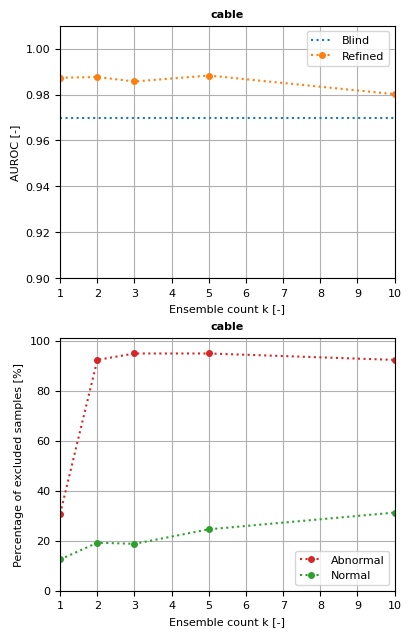

In [18]:
%matplotlib inline 
# Plot setttings
fontsize = 8
markersize = 4

# Prepare data
splits = k_ls   ### TODO: adapt
performance_blind_mean = np.mean(performance_blind_arr, axis=0)
performance_blind_std = np.std(performance_blind_arr, axis=0)
performance_refined_mean = np.mean(performance_refined_arr, axis=0)
performance_refined_std = np.std(performance_refined_arr, axis=0)

# Plot data
fig, axs = plt.subplots(2, 1, figsize=(4,6.25), constrained_layout=True)
axs[0].plot(splits, performance_blind_mean, label="Blind", color='C0', markersize = markersize, linestyle='dotted')
axs[0].fill_between(splits, performance_blind_mean-performance_blind_std, performance_blind_mean+performance_blind_std, color='C0', alpha=0.2, linewidth=0.0)
axs[0].plot(splits, performance_refined_mean, marker="o", label="Refined", color='C1', markersize = markersize, linestyle='dotted')
axs[0].fill_between(splits, performance_refined_mean-performance_refined_std, performance_refined_mean+performance_refined_std, color='C1', alpha=0.2, linewidth=0.0)

# Format plot
axs[0].grid()
axs[0].set_title(str(category_arr[idx_category]), fontsize=fontsize, fontweight="bold")
axs[0].legend(fontsize=fontsize)
axs[0].set_xlim([min(splits), max(splits)])
axs[0].set_ylim([0.9, 1.01])
axs[0].set_xlabel("Ensemble count k [-]", fontsize=fontsize)
axs[0].set_ylabel("AUROC [-]", fontsize=fontsize)
axs[0].xaxis.set_tick_params(labelsize=fontsize)
axs[0].yaxis.set_tick_params(labelsize=fontsize)


# Prepare data
excluded_perc_abnormal_arr = np.array([[item for item in sublist[0]] for sublist in abnormal_excluded_arr]) / np.array([[item for item in sublist[0]] for sublist in abnormal_total_arr])*100
excluded_perc_normal_arr = np.array([[item for item in sublist[0]] for sublist in normal_excluded_arr]) / np.array([[item for item in sublist[0]] for sublist in normal_total_arr])*100

excluded_perc_abnormal_mean = np.mean(excluded_perc_abnormal_arr, axis=0)
excluded_perc_abnormal_std = np.std(excluded_perc_abnormal_arr, axis=0)
excluded_perc_normal_mean = np.mean(excluded_perc_normal_arr, axis=0)
excluded_perc_normal_std = np.std(excluded_perc_normal_arr, axis=0)

# Plot data
axs[1].plot(splits, excluded_perc_abnormal_mean, marker="o", label="Abnormal", color='C3', markersize = markersize, linestyle='dotted')
axs[1].fill_between(splits, excluded_perc_abnormal_mean-excluded_perc_abnormal_std, excluded_perc_abnormal_mean+excluded_perc_abnormal_std, color='C3', alpha=0.2, linewidth=0.0)
axs[1].plot(splits, excluded_perc_normal_mean, marker="o", label="Normal", color='C2', markersize = markersize, linestyle='dotted')
axs[1].fill_between(splits, excluded_perc_normal_mean-excluded_perc_normal_std, excluded_perc_normal_mean+excluded_perc_normal_std, color='C2', alpha=0.2, linewidth=0.0)

# Format plot
axs[1].grid()
axs[1].set_title(str(category_arr[idx_category]), fontsize=fontsize, fontweight="bold")
axs[1].legend(fontsize=fontsize)
axs[1].set_xlim([min(splits), max(splits)])
axs[1].set_ylim([0, 101])
axs[1].set_xlabel("Ensemble count k [-]", fontsize=fontsize)
axs[1].set_ylabel("Percentage of excluded samples [%]", fontsize=fontsize)
axs[1].xaxis.set_tick_params(labelsize=fontsize)
axs[1].yaxis.set_tick_params(labelsize=fontsize)

#### Plot Quality of PseudoLabels

In [147]:
splits

[1, 2, 3, 5, 10]

In [155]:
excluded_perc_abnormal_arr

array([[0.30769231, 0.92307692, 0.94871795, 0.94871795, 0.92307692],
       [0.30769231, 0.87179487, 0.94871795, 0.92307692, 0.92307692],
       [0.43589744, 1.        , 0.94871795, 0.92307692, 0.94871795]])

In [157]:
excluded_perc_abnormal_arr

array([[ 30.76923077,  92.30769231,  94.87179487,  94.87179487,
         92.30769231],
       [ 30.76923077,  87.17948718,  94.87179487,  92.30769231,
         92.30769231],
       [ 43.58974359, 100.        ,  94.87179487,  92.30769231,
         94.87179487]])

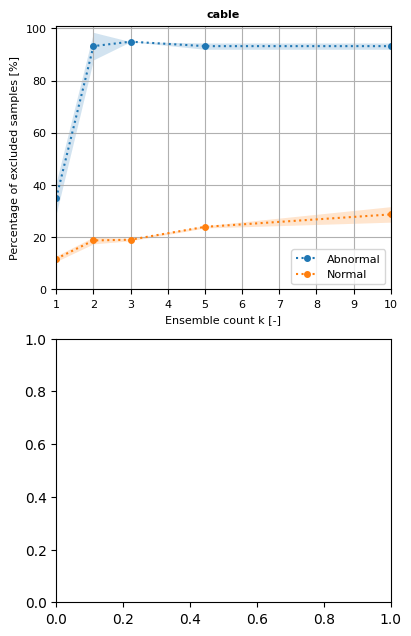

In [159]:
# Plot setttings
fontsize = 8
#markersize = 4

# Prepare data
splits = k_ls   ### TODO: adapt
excluded_perc_abnormal_arr = np.array([[item for item in sublist[0]] for sublist in abnormal_excluded_arr]) / np.array([[item for item in sublist[0]] for sublist in abnormal_total_arr])*100
excluded_perc_normal_arr = np.array([[item for item in sublist[0]] for sublist in normal_excluded_arr]) / np.array([[item for item in sublist[0]] for sublist in normal_total_arr])*100

excluded_perc_abnormal_mean = np.mean(excluded_perc_abnormal_arr, axis=0)
excluded_perc_abnormal_std = np.std(excluded_perc_abnormal_arr, axis=0)
excluded_perc_normal_mean = np.mean(excluded_perc_normal_arr, axis=0)
excluded_perc_normal_std = np.std(excluded_perc_normal_arr, axis=0)

# Plot data
fig, axs = plt.subplots(2, 1, figsize=(4,6.25), constrained_layout=True)
axs[0].plot(splits, excluded_perc_abnormal_mean, marker="o", label="Abnormal", color='C0', markersize = markersize, linestyle='dotted')
axs[0].fill_between(splits, excluded_perc_abnormal_mean-excluded_perc_abnormal_std, excluded_perc_abnormal_mean+excluded_perc_abnormal_std, color='C0', alpha=0.2, linewidth=0.0)
axs[0].plot(splits, excluded_perc_normal_mean, marker="o", label="Normal", color='C1', markersize = markersize, linestyle='dotted')
axs[0].fill_between(splits, excluded_perc_normal_mean-excluded_perc_normal_std, excluded_perc_normal_mean+excluded_perc_normal_std, color='C1', alpha=0.2, linewidth=0.0)

# Format plot
axs[0].grid()
axs[0].set_title(str(category_arr[idx_category]), fontsize=fontsize, fontweight="bold")
axs[0].legend(fontsize=fontsize)
axs[0].set_xlim([min(splits), max(splits)])
axs[0].set_ylim([0, 101])
axs[0].set_xlabel("Ensemble count k [-]", fontsize=fontsize)
axs[0].set_ylabel("Percentage of excluded samples [%]", fontsize=fontsize)
axs[0].xaxis.set_tick_params(labelsize=fontsize)
axs[0].yaxis.set_tick_params(labelsize=fontsize)




In [ ]:
# Extract performance values using nested list comprehensions
performance_refined_arr = np.array([[entry[0]['image_AUROC'] for entry in row] for row in results_test_refined_arr[:, idx_category][:]])
performance_blind_arr = np.array([[entry[0]['image_AUROC'] for entry in row] for row in results_test_blind_arr[:, idx_category][:]])
print(performance_refined_arr)
print(performance_blind_arr)

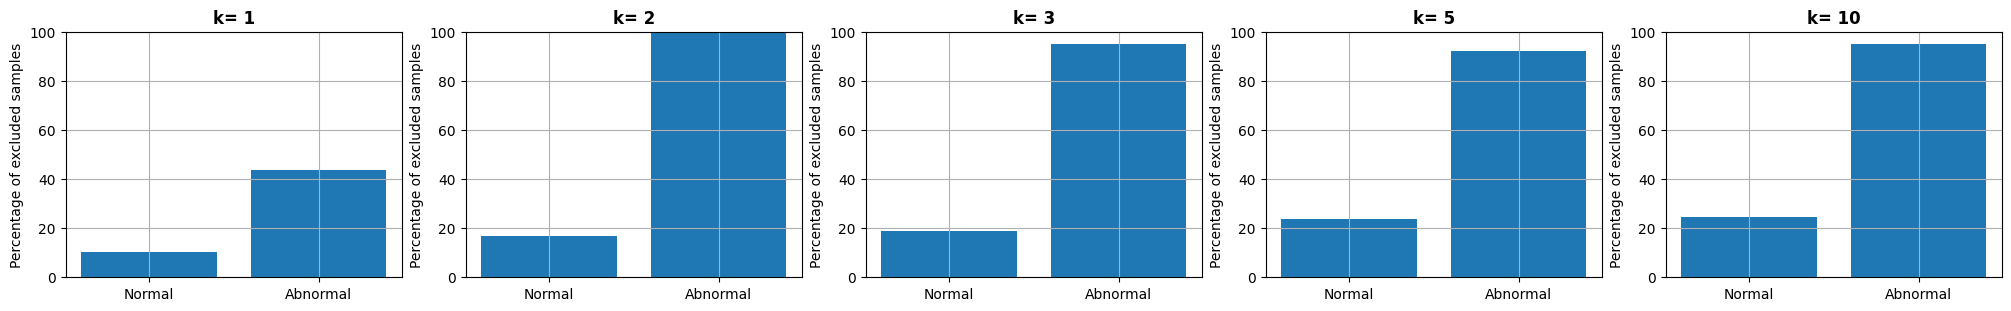

In [116]:
# Prepare plots
n_plots = len(k_ls)
fig, axs = plt.subplots(1, n_plots, figsize=(4*n_plots, 3 ), constrained_layout=True)


for k_iter, k in enumerate(k_ls): 

    abnormal_total = abnormal_total_ls[k_iter]
    abnormal_excluded = abnormal_excluded_ls[k_iter]
    normal_total = normal_total_ls[k_iter]
    normal_excluded = normal_excluded_ls[k_iter]

    #excluded_perc_total = (normal_excluded+normal_excluded)/()
    excluded_perc_normal = normal_excluded / normal_total*100
    excluded_perc_abnormal = abnormal_excluded / abnormal_total*100


    %matplotlib inline

    x = ['Normal', 'Abnormal']
    y = [excluded_perc_normal, excluded_perc_abnormal]

    axs[k_iter].bar(x, y)
    axs[k_iter].set_title("k= "+str(k), fontweight="bold")
    axs[k_iter].set_ylabel("Percentage of excluded samples", fontsize=10)
    axs[k_iter].set_ylim([0,100])
    axs[k_iter].grid()

In [101]:
performance_blind_mean
performance_blind_std

array([0.00808413, 0.00808413, 0.00808413, 0.00808413, 0.00808413])

<function matplotlib.pyplot.show(close=None, block=None)>

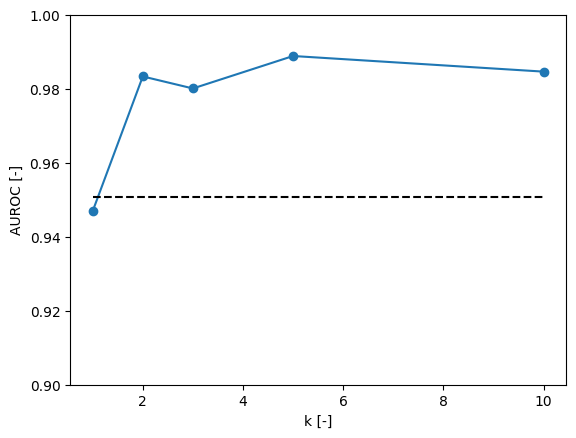

In [96]:
%matplotlib inline 
#image_AUROC_arr = np.array([d[0]['image_AUROC'] for d in results_test_refined_ls])
#image_AUROC_blind_arr = np.array([d[0]['image_AUROC'] for d in results_test_blind_ls])
idx_run = 2
plt.plot(k_ls, performance_refined_arr[idx_run,:], '-o', color="C0")
plt.hlines(perfromance_blind_arr[idx_run,0], k_ls[0], k_ls[-1], color="k", linestyles='dashed')
plt.ylim([0.9, 1.0])
plt.ylabel("AUROC [-]")
plt.xlabel("k [-]")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

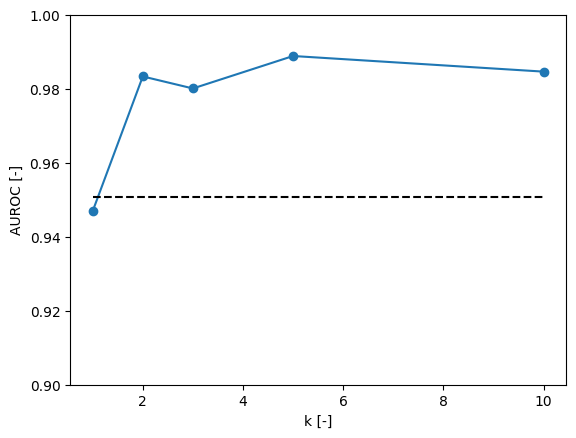

In [13]:
%matplotlib inline 
#image_AUROC_arr = np.array([d[0]['image_AUROC'] for d in results_test_refined_ls])
#image_AUROC_blind_arr = np.array([d[0]['image_AUROC'] for d in results_test_blind_ls])

plt.plot(k_ls, image_AUROC_arr, '-o', color="C0")
plt.hlines(image_AUROC_blind_arr[0], k_ls[0], k_ls[-1], color="k", linestyles='dashed')
plt.ylim([0.9, 1.0])
plt.ylabel("AUROC [-]")
plt.xlabel("k [-]")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

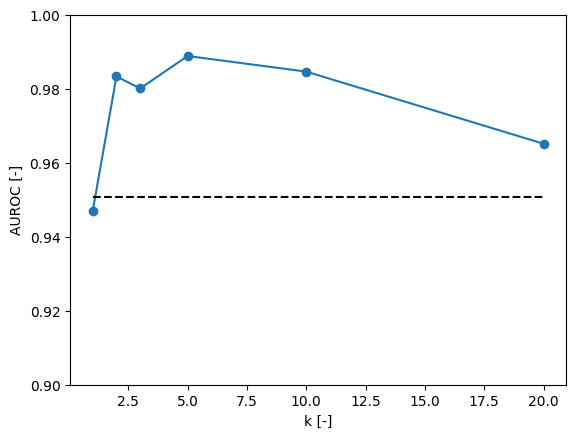

In [10]:
%matplotlib inline 
image_AUROC_arr = np.array([d[0]['image_AUROC'] for d in results_test_refined_ls])
image_AUROC_blind_arr = np.array([d[0]['image_AUROC'] for d in results_test_blind_ls])

plt.plot(k_ls, image_AUROC_arr, '-o', color="C0")
plt.hlines(image_AUROC_blind_arr[0], k_ls[0], k_ls[-1], color="k", linestyles='dashed')
plt.ylim([0.9, 1.0])
plt.ylabel("AUROC [-]")
plt.xlabel("k [-]")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

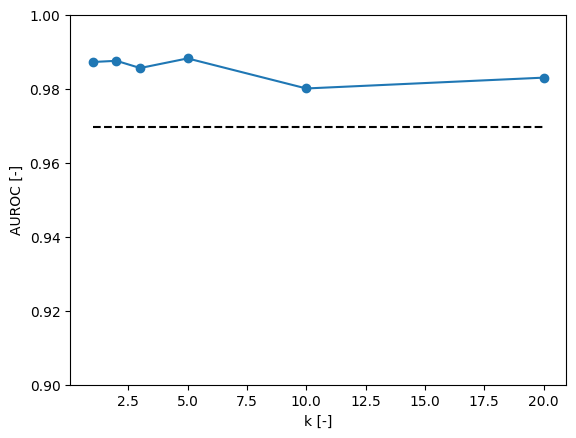

In [23]:
%matplotlib inline 
image_AUROC_arr = np.array([d[0]['image_AUROC'] for d in results_test_refined_ls])
image_AUROC_blind_arr = np.array([d[0]['image_AUROC'] for d in results_test_blind_ls])

plt.plot(k_ls, image_AUROC_arr, '-o', color="C0")
plt.hlines(image_AUROC_blind_arr[0], k_ls[0], k_ls[-1], color="k", linestyles='dashed')
plt.ylim([0.9, 1.0])
plt.ylabel("AUROC [-]")
plt.xlabel("k [-]")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

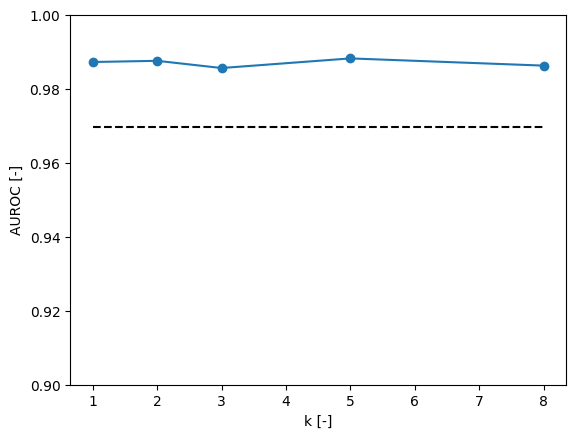

In [7]:
%matplotlib inline 
image_AUROC_arr = np.array([d[0]['image_AUROC'] for d in results_test_refined_ls])
image_AUROC_blind_arr = np.array([d[0]['image_AUROC'] for d in results_test_blind_ls])

plt.plot(k_ls, image_AUROC_arr, '-o', color="C0")
plt.hlines(image_AUROC_blind_arr[0], k_ls[0], k_ls[-1], color="k", linestyles='dashed')
plt.ylim([0.9, 1.0])
plt.ylabel("AUROC [-]")
plt.xlabel("k [-]")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

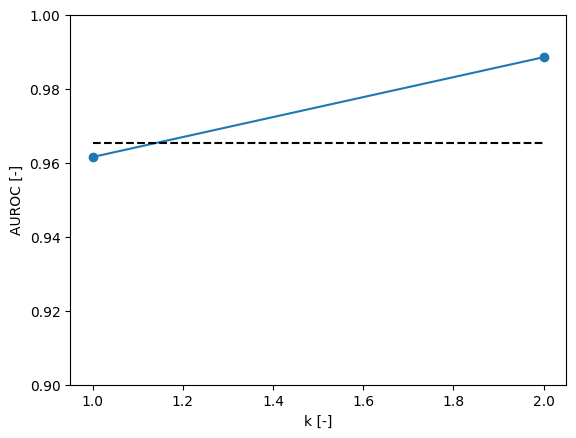

In [13]:
%matplotlib inline 
image_AUROC_arr = np.array([d[0]['image_AUROC'] for d in results_test_refined_ls])
image_AUROC_blind_arr = np.array([d[0]['image_AUROC'] for d in results_test_blind_ls])

plt.plot(k_ls, image_AUROC_arr, '-o', color="C0")
plt.hlines(image_AUROC_blind_arr[0], k_ls[0], k_ls[-1], color="k", linestyles='dashed')
plt.ylim([0.9, 1.0])
plt.ylabel("AUROC [-]")
plt.xlabel("k [-]")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

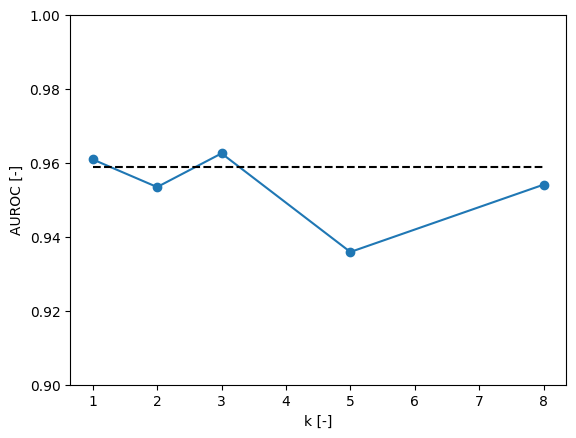

In [6]:
%matplotlib inline 
image_AUROC_arr = np.array([d[0]['image_AUROC'] for d in results_test_refined_ls])
image_AUROC_blind_arr = np.array([d[0]['image_AUROC'] for d in results_test_blind_ls])

plt.plot(k_ls, image_AUROC_arr, '-o', color="C0")
plt.hlines(image_AUROC_blind_arr[0], k_ls[0], k_ls[-1], color="k", linestyles='dashed')
plt.ylim([0.9, 1.0])
plt.ylabel("AUROC [-]")
plt.xlabel("k [-]")
plt.show


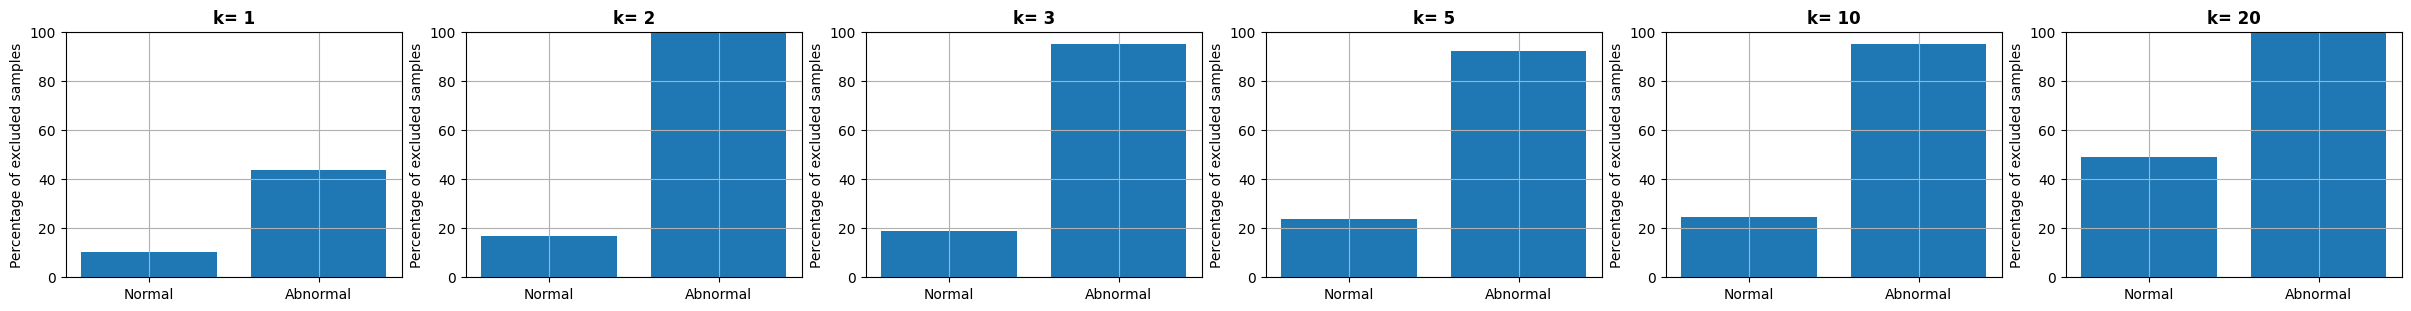

In [11]:
# Prepare plots
n_plots = len(k_ls)
fig, axs = plt.subplots(1, n_plots, figsize=(4*n_plots, 3 ), constrained_layout=True)


for k_iter, k in enumerate(k_ls): 

    abnormal_total = abnormal_total_ls[k_iter]
    abnormal_excluded = abnormal_excluded_ls[k_iter]
    normal_total = normal_total_ls[k_iter]
    normal_excluded = normal_excluded_ls[k_iter]

    #excluded_perc_total = (normal_excluded+normal_excluded)/()
    excluded_perc_normal = normal_excluded / normal_total*100
    excluded_perc_abnormal = abnormal_excluded / abnormal_total*100


    %matplotlib inline

    x = ['Normal', 'Abnormal']
    y = [excluded_perc_normal, excluded_perc_abnormal]

    axs[k_iter].bar(x, y)
    axs[k_iter].set_title("k= "+str(k), fontweight="bold")
    axs[k_iter].set_ylabel("Percentage of excluded samples", fontsize=10)
    axs[k_iter].set_ylim([0,100])
    axs[k_iter].grid()

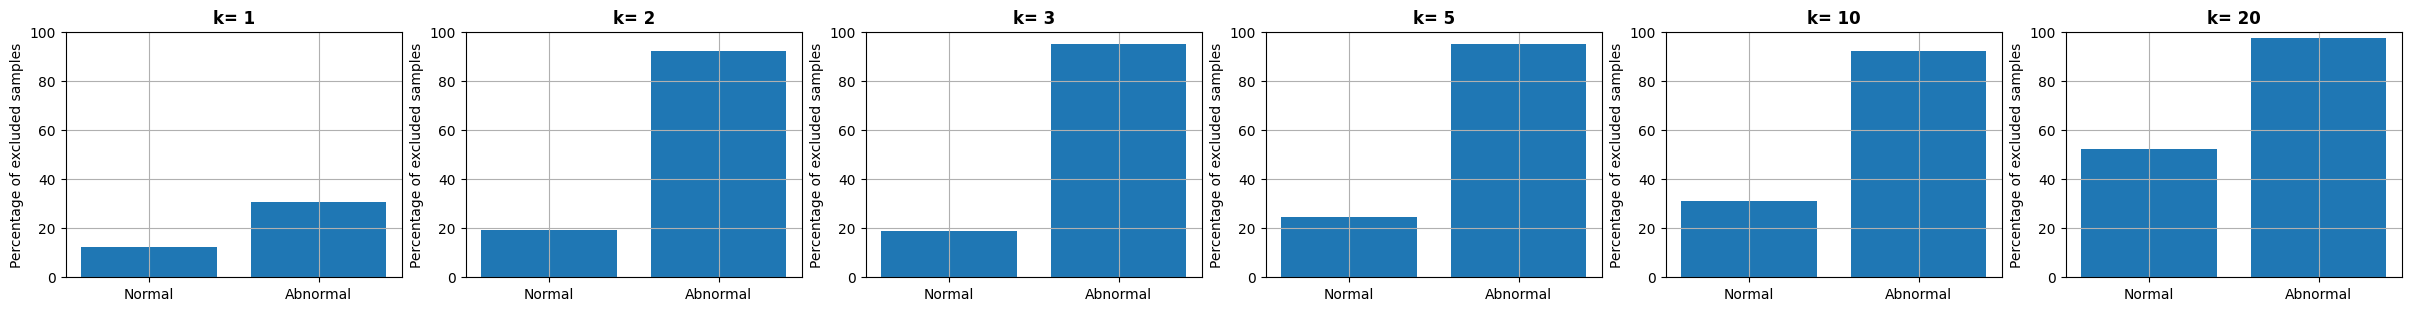

In [24]:
# Prepare plots
n_plots = len(k_ls)
fig, axs = plt.subplots(1, n_plots, figsize=(4*n_plots, 3 ), constrained_layout=True)


for k_iter, k in enumerate(k_ls): 

    abnormal_total = abnormal_total_ls[k_iter]
    abnormal_excluded = abnormal_excluded_ls[k_iter]
    normal_total = normal_total_ls[k_iter]
    normal_excluded = normal_excluded_ls[k_iter]

    #excluded_perc_total = (normal_excluded+normal_excluded)/()
    excluded_perc_normal = normal_excluded / normal_total*100
    excluded_perc_abnormal = abnormal_excluded / abnormal_total*100


    %matplotlib inline

    x = ['Normal', 'Abnormal']
    y = [excluded_perc_normal, excluded_perc_abnormal]

    axs[k_iter].bar(x, y)
    axs[k_iter].set_title("k= "+str(k), fontweight="bold")
    axs[k_iter].set_ylabel("Percentage of excluded samples", fontsize=10)
    axs[k_iter].set_ylim([0,100])
    axs[k_iter].grid()

In [22]:
k_ls

[1, 2, 3, 5, 8]

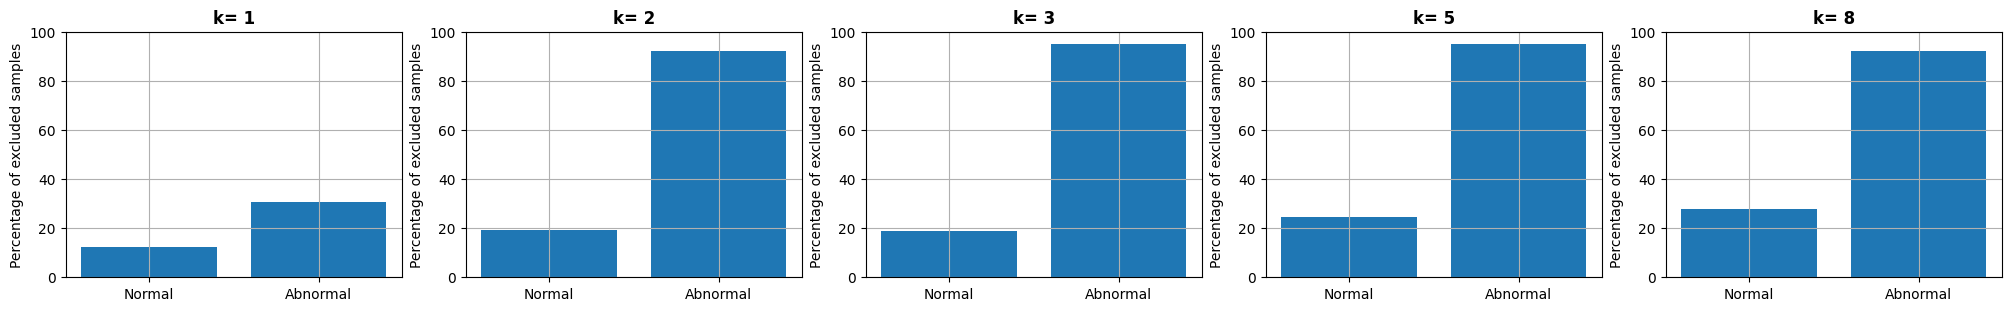

In [8]:
# Prepare plots
n_plots = len(k_ls)
fig, axs = plt.subplots(1, n_plots, figsize=(4*n_plots, 3 ), constrained_layout=True)


for k_iter, k in enumerate(k_ls): 

    abnormal_total = abnormal_total_ls[k_iter]
    abnormal_excluded = abnormal_excluded_ls[k_iter]
    normal_total = normal_total_ls[k_iter]
    normal_excluded = normal_excluded_ls[k_iter]

    #excluded_perc_total = (normal_excluded+normal_excluded)/()
    excluded_perc_normal = normal_excluded / normal_total*100
    excluded_perc_abnormal = abnormal_excluded / abnormal_total*100


    %matplotlib inline

    x = ['Normal', 'Abnormal']
    y = [excluded_perc_normal, excluded_perc_abnormal]

    axs[k_iter].bar(x, y)
    axs[k_iter].set_title("k= "+str(k), fontweight="bold")
    axs[k_iter].set_ylabel("Percentage of excluded samples", fontsize=10)
    axs[k_iter].set_ylim([0,100])
    axs[k_iter].grid()

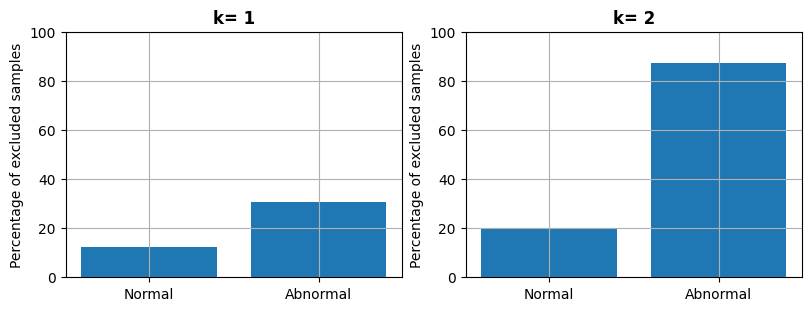

In [15]:
# Prepare plots
n_plots = len(k_ls)
fig, axs = plt.subplots(1, n_plots, figsize=(4*n_plots, 3 ), constrained_layout=True)


for k_iter, k in enumerate(k_ls): 

    abnormal_total = abnormal_total_ls[k_iter]
    abnormal_excluded = abnormal_excluded_ls[k_iter]
    normal_total = normal_total_ls[k_iter]
    normal_excluded = normal_excluded_ls[k_iter]

    #excluded_perc_total = (normal_excluded+normal_excluded)/()
    excluded_perc_normal = normal_excluded / normal_total*100
    excluded_perc_abnormal = abnormal_excluded / abnormal_total*100


    %matplotlib inline

    x = ['Normal', 'Abnormal']
    y = [excluded_perc_normal, excluded_perc_abnormal]

    axs[k_iter].bar(x, y)
    axs[k_iter].set_title("k= "+str(k), fontweight="bold")
    axs[k_iter].set_ylabel("Percentage of excluded samples", fontsize=10)
    axs[k_iter].set_ylim([0,100])
    axs[k_iter].grid()

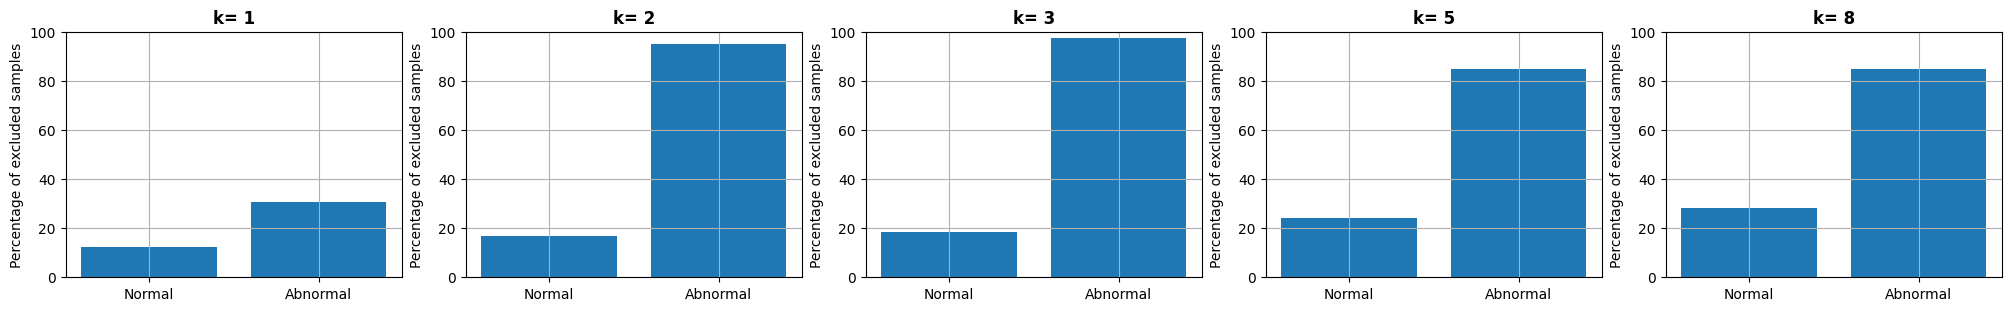

In [26]:
# Prepare plots
n_plots = len(k_ls)
fig, axs = plt.subplots(1, n_plots, figsize=(4*n_plots, 3 ), constrained_layout=True)


for k_iter, k in enumerate(k_ls): 

    abnormal_total = abnormal_total_ls[k_iter]
    abnormal_excluded = abnormal_excluded_ls[k_iter]
    normal_total = normal_total_ls[k_iter]
    normal_excluded = normal_excluded_ls[k_iter]

    #excluded_perc_total = (normal_excluded+normal_excluded)/()
    excluded_perc_normal = normal_excluded / normal_total*100
    excluded_perc_abnormal = abnormal_excluded / abnormal_total*100


    %matplotlib inline

    x = ['Normal', 'Abnormal']
    y = [excluded_perc_normal, excluded_perc_abnormal]

    axs[k_iter].bar(x, y)
    axs[k_iter].set_title("k= "+str(k), fontweight="bold")
    axs[k_iter].set_ylabel("Percentage of excluded samples", fontsize=10)
    axs[k_iter].set_ylim([0,100])
    axs[k_iter].grid()

In [29]:
 + normal_total

263

In [30]:
abnormal_total

39

In [8]:
abnormal_total = 0
abnormal_excluded = 0
normal_total = 0
normal_excluded = 0

for i in range(train_dataset.__len__()):

    if train_dataset.__getitem__(i)["label"] == 1:
        abnormal_total += 1
        if ~np.isin(i, keep_indices):
            abnormal_excluded += 1
    elif train_dataset.__getitem__(i)["label"] == 0:
        normal_total += 1
        if ~np.isin(i, keep_indices):
            normal_excluded += 1


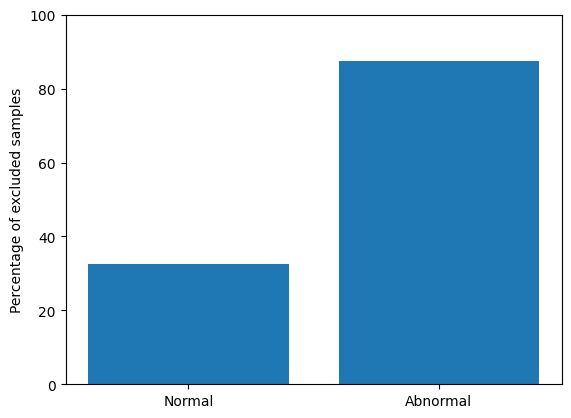

In [9]:
excluded_perc_normal = normal_excluded / normal_total*100
excluded_perc_abnormal = abnormal_excluded / abnormal_total*100


%matplotlib inline

x = ['Normal', 'Abnormal']
y = [excluded_perc_normal, excluded_perc_abnormal]

plt.bar(x, y)
plt.ylabel("Percentage of excluded samples", fontsize=10)
plt.ylim([0,100])
plt.show()

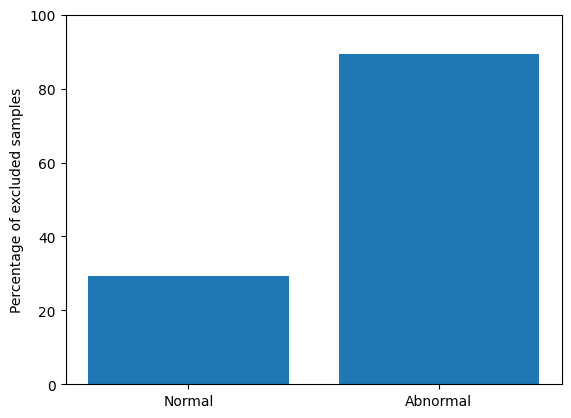

In [72]:
excluded_perc_normal = normal_excluded / normal_total*100
excluded_perc_abnormal = abnormal_excluded / abnormal_total*100


%matplotlib inline

x = ['Normal', 'Abnormal']
y = [excluded_perc_normal, excluded_perc_abnormal]

plt.bar(x, y)
plt.ylabel("Percentage of excluded samples", fontsize=10)
plt.ylim([0,100])
plt.show()


In [15]:
normal_excluded

63

In [16]:
abnormal_total

NameError: name 'abnormal_total' is not defined

In [58]:
normal_total

320

In [60]:
abnormal_total/(abnormal_total+normal_total)

0.14893617021276595

In [61]:
abnormal_excluded

50

In [62]:
normal_excluded

94

In [55]:
keep_indices

In [43]:
keep_indices

array([ 14,  17,  39,  40,  46,  49,  56,  57,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  70,  71,  72,  73,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  96,  98, 100, 101, 103, 104, 105, 106, 107, 108,
       109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137,
       139, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 185, 186, 187, 189, 191, 194, 195, 196, 197, 200, 202, 204,
       205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 219,
       220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       236, 237, 243, 244, 246, 247, 248, 250, 251, 252, 254, 256, 257,
       258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 27

In [44]:
classifications_subset_arr

array([[False,  True,  True],
       [ True, False,  True],
       [ True,  True, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [47]:
classifications_subset_arr[39]

array([False, False, False])

In [41]:
keep_bool_arr.shape[0]

376

In [40]:
keep_bool_arr[keep_bool_arr==True].shape[0]

262

In [36]:
keep_indices.shape[0]/train_dataset_length

0.6968085106382979

In [17]:
#run = 2, k = 1
results_test_refined

[{'image_AUROC': 0.9725126028060913,
  'image_AUPR': 0.9822270274162292,
  'image_F1Score': 0.9384615421295166}]

In [20]:
#run = 2, k = 2
results_test_refined
# keep_indices.shape[0]/train_dataset_length=0.6968085106382979

[{'image_AUROC': 0.9488966464996338,
  'image_AUPR': 0.9675688147544861,
  'image_F1Score': 0.8960000276565552}]

In [34]:
#run = 2, k = 3
results_test_refined
# keep_indices.shape[0]/train_dataset_length=0.6968085106382979

[{'image_AUROC': 0.9725125432014465,
  'image_AUPR': 0.9794353246688843,
  'image_F1Score': 0.9465649127960205}]

In [49]:
#run = 2, k = 4
results_test_refined
# keep_indices.shape[0]/train_dataset_length=0.6170212765957447

[{'image_AUROC': 0.9608981609344482,
  'image_AUPR': 0.9742913842201233,
  'image_F1Score': 0.9384615421295166}]

In [11]:
#run = 2, k = 5
results_test_refined
# keep_indices.shape[0]/train_dataset_length=0.5930851063829787

[{'image_AUROC': 0.9728997349739075,
  'image_AUPR': 0.9820098280906677,
  'image_F1Score': 0.9375}]

In [12]:
keep_indices.shape[0]/train_dataset_length

0.5930851063829787

In [14]:
results_test_refined

[{'image_AUROC': 0.9616724252700806,
  'image_AUPR': 0.9760199785232544,
  'image_F1Score': 0.9268292784690857}]

In [12]:
results_test_refined

[{'image_AUROC': 0.9717382788658142,
  'image_AUPR': 0.9816412925720215,
  'image_F1Score': 0.9365079402923584}]

In [8]:
results_test_refined

[{'image_AUROC': 0.9330235719680786,
  'image_AUPR': 0.9586982131004333,
  'image_F1Score': 0.8769230842590332}]

In [9]:
indices_disjoint_datasets[0].shape[0]

376

In [ ]:
results_test_refined

In [10]:
keep_indices.shape[0]/train_dataset_length

0.848404255319149

In [ ]:
keep_bool_arr.shape[0]

In [ ]:
keep_indices.shape[0]

In [ ]:
results_test_refined

In [ ]:
keep_indices

In [ ]:
results_test_refined

In [ ]:
np.all(~classifications_subset_arr, axis=1)

In [ ]:
np.all(~classifications_subset_arr, axis=1).shape[0]

In [ ]:
keep_bool_arr[keep_bool_arr==True].shape



In [ ]:
keep_bool_arr = np.all(~classifications_subset_arr, axis=1)
keep_bool_arr


In [ ]:
keep_indices = np.where(keep_bool_arr)[0]
keep_indices

In [ ]:
type(keep_indices)

In [ ]:
type(keep_bool_arr)

In [ ]:
classifications_subset_arr

In [ ]:
classifications_subset_ls = []

In [ ]:
classifications_subset_ls.append(classifications_subset)

In [ ]:
classifications_subset

In [ ]:
prediction_scores_subset = np.array([d["pred_scores"][0] for d in predictions_subset])
threshold = np.percentile(prediction_scores_subset, q=(1-cont_ratio)*100)
threshold

In [ ]:
prediction_scores_subset[prediction_scores_subset<=threshold].shape[0] / prediction_scores_subset.shape[0]

In [ ]:
predictions_binary_subset = prediction_scores_subset>threshold # 1: abnormal; 0: normal
predictions_binary_subset

In [ ]:
# Plot threshold
%matplotlib inline 

plt.hist(prediction_scores_subset, bins=np.arange(0,1,0.01), alpha=0.5, label='Normal', density=False, color='C0')
plt.vlines(threshold, ymin=0, ymax=50, color='C0', linewidth=1)
plt.show()

In [ ]:
k = 5
run = 1

indices = np.arange(0, train_dataset.__len__())
np.random.seed(run)
np.random.shuffle(indices)
indices_disjoint_datasets = np.array_split(indices, k)

indices_disjoint_datasets

In [ ]:
parts

In [ ]:
len(parts[0])

In [ ]:
len(parts[4])

In [ ]:
dataset.category

In [ ]:
dataset.__getitem__(1)

In [ ]:
dataset.subsample(indices = [14])

In [ ]:
np.arange(0,10)

In [ ]:
dataset.subsample(indices = np.arange(0,50)).__len__()

In [ ]:
for idx_run, run in enumerate(run_arr):
    for idx_cont_ratio, cont_ratio in enumerate(cont_ratio_arr):
        for idx_category, category in enumerate(category_arr):

            print(idx_run)
            print(idx_cont_ratio)
            print(idx_category)
            
            #### Simple refinement ------------------------------------------

            ## Blind training -----------------------------------------------

            # Define datamodule, model, engine
            seed_everything(run, workers=True)
            datamodule_blind = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=[])
            model_blind = Patchcore(coreset_sampling_ratio=0.01) #Padim(backbone="resnet18", n_features=100, layers=["layer1", "layer2", "layer3"])
            engine_blind = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
            
            # Train on original training set
            engine_blind.fit(datamodule=datamodule_blind, model=model_blind)

            # Predict on original training set
            predictions_train_blind = engine_blind.predict(model=model_blind, dataset=datamodule_blind.get_train_dataset())

            # Evaluate on test set
            predictions_test_blind = engine_blind.predict(model=model_blind, dataset=datamodule_blind.get_test_dataset())
            results_test_blind = engine_blind.test(
                model=model_blind,
                datamodule=datamodule_blind,
                ckpt_path=engine_blind.trainer.checkpoint_callback.best_model_path,
                verbose=False
            )
            

            ## Refined training -----------------------------------------------

            # Refine training set
            prediction_scores_blind = np.array([d["pred_scores"][0] for d in predictions_train_blind])
            sorted_indices = sorted(range(len(prediction_scores_blind)), key=lambda i: prediction_scores_blind[i]) 
            selected_indices = sorted_indices[:int((1-cont_ratio) * len(sorted_indices))]
            
            # Define datamodue, model, engine
            seed_everything(run, workers=True)
            datamodule_refined = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=selected_indices)
            model_refined = Patchcore(coreset_sampling_ratio=0.01)
            engine_refined = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
            
            # Train on refined training set
            engine_refined.fit(datamodule=datamodule_refined, model=model_refined)

            # Diagnostics: Predict on refined training set 
            predictions_train_refined = engine_refined.predict(model=model_refined, dataset=datamodule_refined.get_train_dataset())

            # Diagnostics: Predict on refined unselected training set 
            train_dataset_refined_unselected = datamodule_refined.get_train_dataset_unselected()
            predictions_train_refined_unselected = engine_refined.predict(model=model_refined, dataset=train_dataset_refined_unselected)

            # Evaluate on test set
            predictions_test_refined = engine_refined.predict(model=model_refined, dataset=datamodule_refined.get_test_dataset())
            results_test_refined = engine_refined.test(
                model=model_refined,
                datamodule=datamodule_refined,
                ckpt_path=engine_refined.trainer.checkpoint_callback.best_model_path,
                verbose=False
            )
            

            ## Save results (iteration) ---------------------------------------------------

            # Save blind training results
            predictions_train_blind_arr[idx_run, idx_cont_ratio, idx_category] = predictions_train_blind
            predictions_test_blind_arr[idx_run, idx_cont_ratio, idx_category] = predictions_test_blind
            results_test_blind_arr[idx_run, idx_cont_ratio, idx_category] = results_test_blind

            # Save refined training results
            predictions_train_refined_arr[idx_run, idx_cont_ratio, idx_category] = predictions_train_refined
            predictions_train_refined_unselected_arr[idx_run, idx_cont_ratio, idx_category] = predictions_train_refined_unselected
            predictions_test_refined_arr[idx_run, idx_cont_ratio, idx_category] = predictions_test_refined
            results_test_refined_arr[idx_run, idx_cont_ratio, idx_category] = results_test_refined


## Save results
results_dict = {
    "dimensions": {
        "run_arr": run_arr,
        "cont_ratio_arr": cont_ratio_arr,
        "category_arr": category_arr
    },
    "results": {
        "predictions_train_blind_arr": predictions_train_blind_arr, 
        "predictions_test_blind_arr": predictions_test_blind_arr,
        "results_test_blind_arr": results_test_blind_arr, 
        "predictions_train_refined_arr": predictions_train_refined_arr, 
        "predictions_train_refined_unselected_arr": predictions_train_refined_unselected_arr, 
        "predictions_test_refined_arr": predictions_test_refined_arr, 
        "results_test_refined_arr": results_test_refined_arr
    }
}




### Run Experiment (Simple Refinement)

In [ ]:
# Define path
save_folder = "./results/Patchcore/"
name = "20240411_Patchcore_simple_refinement_01.pickle"
target_path = os.path.join(save_folder, name)


In [ ]:
# Save blind training results
predictions_train_blind_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)
predictions_test_blind_arr  = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)
results_test_blind_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)

# Save refined training results
predictions_train_refined_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)
predictions_train_refined_unselected_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)
predictions_test_refined_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)
results_test_refined_arr = np.empty([run_arr.shape[0], cont_ratio_arr.shape[0], category_arr.shape[0]], dtype=object)

In [ ]:
for idx_run, run in enumerate(run_arr):
    for idx_cont_ratio, cont_ratio in enumerate(cont_ratio_arr):
        for idx_category, category in enumerate(category_arr):

            print(idx_run)
            print(idx_cont_ratio)
            print(idx_category)
            
            #### Simple refinement ------------------------------------------

            ## Blind training -----------------------------------------------

            # Define datamodule, model, engine
            seed_everything(run, workers=True)
            datamodule_blind = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=[])
            model_blind = Patchcore(coreset_sampling_ratio=0.01) #Padim(backbone="resnet18", n_features=100, layers=["layer1", "layer2", "layer3"])
            engine_blind = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
            
            # Train on original training set
            engine_blind.fit(datamodule=datamodule_blind, model=model_blind)

            # Predict on original training set
            predictions_train_blind = engine_blind.predict(model=model_blind, dataset=datamodule_blind.get_train_dataset())

            # Evaluate on test set
            predictions_test_blind = engine_blind.predict(model=model_blind, dataset=datamodule_blind.get_test_dataset())
            results_test_blind = engine_blind.test(
                model=model_blind,
                datamodule=datamodule_blind,
                ckpt_path=engine_blind.trainer.checkpoint_callback.best_model_path,
                verbose=False
            )
            

            ## Refined training -----------------------------------------------

            # Refine training set
            prediction_scores_blind = np.array([d["pred_scores"][0] for d in predictions_train_blind])
            sorted_indices = sorted(range(len(prediction_scores_blind)), key=lambda i: prediction_scores_blind[i]) 
            selected_indices = sorted_indices[:int((1-cont_ratio) * len(sorted_indices))]
            
            # Define datamodue, model, engine
            seed_everything(run, workers=True)
            datamodule_refined = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=selected_indices)
            model_refined = Patchcore(coreset_sampling_ratio=0.01)
            engine_refined = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
            
            # Train on refined training set
            engine_refined.fit(datamodule=datamodule_refined, model=model_refined)

            # Diagnostics: Predict on refined training set 
            predictions_train_refined = engine_refined.predict(model=model_refined, dataset=datamodule_refined.get_train_dataset())

            # Diagnostics: Predict on refined unselected training set 
            train_dataset_refined_unselected = datamodule_refined.get_train_dataset_unselected()
            predictions_train_refined_unselected = engine_refined.predict(model=model_refined, dataset=train_dataset_refined_unselected)

            # Evaluate on test set
            predictions_test_refined = engine_refined.predict(model=model_refined, dataset=datamodule_refined.get_test_dataset())
            results_test_refined = engine_refined.test(
                model=model_refined,
                datamodule=datamodule_refined,
                ckpt_path=engine_refined.trainer.checkpoint_callback.best_model_path,
                verbose=False
            )
            

            ## Save results (iteration) ---------------------------------------------------

            # Save blind training results
            predictions_train_blind_arr[idx_run, idx_cont_ratio, idx_category] = predictions_train_blind
            predictions_test_blind_arr[idx_run, idx_cont_ratio, idx_category] = predictions_test_blind
            results_test_blind_arr[idx_run, idx_cont_ratio, idx_category] = results_test_blind

            # Save refined training results
            predictions_train_refined_arr[idx_run, idx_cont_ratio, idx_category] = predictions_train_refined
            predictions_train_refined_unselected_arr[idx_run, idx_cont_ratio, idx_category] = predictions_train_refined_unselected
            predictions_test_refined_arr[idx_run, idx_cont_ratio, idx_category] = predictions_test_refined
            results_test_refined_arr[idx_run, idx_cont_ratio, idx_category] = results_test_refined


## Save results
results_dict = {
    "dimensions": {
        "run_arr": run_arr,
        "cont_ratio_arr": cont_ratio_arr,
        "category_arr": category_arr
    },
    "results": {
        "predictions_train_blind_arr": predictions_train_blind_arr, 
        "predictions_test_blind_arr": predictions_test_blind_arr,
        "results_test_blind_arr": results_test_blind_arr, 
        "predictions_train_refined_arr": predictions_train_refined_arr, 
        "predictions_train_refined_unselected_arr": predictions_train_refined_unselected_arr, 
        "predictions_test_refined_arr": predictions_test_refined_arr, 
        "results_test_refined_arr": results_test_refined_arr
    }
}




In [ ]:
# Save results
import pickle
with open(target_path, "wb") as pickle_file:
    pickle.dump(results_dict, pickle_file)


### Plot Results (Simple Refinement)

In [ ]:
# Define path
load_folder = "./results/Patchcore/"
name = "20240410_Patchcore_simple_refinement.pickle"
source_path = target_path#os.path.join(load_folder, name)


In [ ]:
# Load results
import pickle
pickle_file_path = source_path
with open(pickle_file_path, "rb") as pickle_file:
    loaded_dict = pickle.load(pickle_file)
loaded_dict

In [ ]:
## Plot "Anomaly Score Distribution"
%matplotlib inline 
from scipy.stats import norm
      
# Unnest dictionary
for key, value in loaded_dict["dimensions"].items():
    locals()[key] = value
for key, value in loaded_dict["results"].items():
    locals()[key] = value

# Choose scenario (category, contamination ratio)
idx_category = 0
idx_cont_ratio = 0
#idx_run = 0


fig, axs = plt.subplots(5, run_arr.shape[0], sharey=True, tight_layout=True, figsize=(3*run_arr.shape[0], 5*2))

for idx_run, run in enumerate(run_arr):

    ## Prepare data
    # Blind training
    predictions_train_blind = predictions_train_blind_arr[idx_run, idx_cont_ratio, idx_category]
    prediction_scores_train_blind = np.array([d["pred_scores"][0] for d in predictions_train_blind])
    lables_train_blind = np.array([d["label"][0] for d in predictions_train_blind])

    # Blind training, evaluated on test set 
    predictions_test_blind = predictions_test_blind_arr[idx_run, idx_cont_ratio, idx_category]
    prediction_scores_test_blind = np.array([d["pred_scores"][0] for d in predictions_test_blind])
    lables_test_blind = np.array([d["label"][0] for d in predictions_test_blind])

    # Refined training, selected
    predictions_train_refined = predictions_train_refined_arr[idx_run, idx_cont_ratio, idx_category]
    prediction_scores_train_refined = np.array([d["pred_scores"][0] for d in predictions_train_refined])
    lables_train_refined = np.array([d["label"][0] for d in predictions_train_refined])

    # Refined training, unselected
    predictions_train_refined_unselected = predictions_train_refined_unselected_arr[idx_run, idx_cont_ratio, idx_category]
    prediction_scores_train_refined_unselected = np.array([d["pred_scores"][0] for d in predictions_train_refined_unselected])
    lables_train_refined_unselected = np.array([d["label"][0] for d in predictions_train_refined_unselected])
    
    # Blind training, evaluated on test set 
    predictions_test_refined = predictions_test_refined_arr[idx_run, idx_cont_ratio, idx_category]
    prediction_scores_test_refined = np.array([d["pred_scores"][0] for d in predictions_test_refined])
    lables_refined_blind = np.array([d["label"][0] for d in predictions_test_refined])

    # Data to plot
    dist11 = prediction_scores_train_blind[lables_train_blind==0]
    dist12 = prediction_scores_train_blind[lables_train_blind==1]
    dist21 = prediction_scores_test_blind[lables_test_blind==0]
    dist22 = prediction_scores_test_blind[lables_test_blind==1]
    dist31 = prediction_scores_train_refined[lables_train_refined==0]
    dist32 = prediction_scores_train_refined[lables_train_refined==1]
    dist41 = prediction_scores_train_refined_unselected[lables_train_refined_unselected==0]
    dist42 = prediction_scores_train_refined_unselected[lables_train_refined_unselected==1]
    dist51 = prediction_scores_test_refined[lables_refined_blind==0]
    dist52 = prediction_scores_test_refined[lables_refined_blind==1]

    # Fit a normal distribution to the data
    x = np.arange(0,1,0.01)
    mu11, std11 = norm.fit(dist11)
    mu12, std12 = norm.fit(dist12)
    mu21, std21 = norm.fit(dist21)
    mu22, std22 = norm.fit(dist22)
    mu31, std31 = norm.fit(dist31)
    mu32, std32 = norm.fit(dist32)
    mu41, std41 = norm.fit(dist41)
    mu42, std42 = norm.fit(dist42)
    mu51, std51 = norm.fit(dist51)
    mu52, std52 = norm.fit(dist52)

    p11 = norm.pdf(x, mu11, std11)
    p12 = norm.pdf(x, mu12, std12)
    p21 = norm.pdf(x, mu21, std21)
    p22 = norm.pdf(x, mu22, std22)
    p31 = norm.pdf(x, mu31, std31)
    p32 = norm.pdf(x, mu32, std32)
    p41 = norm.pdf(x, mu41, std41)
    p42 = norm.pdf(x, mu42, std42)
    p51 = norm.pdf(x, mu51, std51)
    p52 = norm.pdf(x, mu52, std52)

    ## Generate plots
    # Define plot parameters
    fontsize = 8
    linewidth = 1
    bin_range = x


    # Plot histograms and pdf curves
    axs[0,idx_run].hist(dist11, bins=bin_range, alpha=0.5, label='Normal', density=False, color='C0')
    axs[0,idx_run].hist(dist12, bins=bin_range, alpha=0.5, label='Abnormal', density=False, color='C1')
    ymax = axs[0,idx_run].get_ylim()[1]
    axs[0,idx_run].set_xlim([0.2,0.8])
    axs[0,idx_run].grid(True)
    axs[0,idx_run].xaxis.set_tick_params(labelsize=fontsize)
    axs[0,idx_run].yaxis.set_tick_params(labelsize=fontsize)
    axs[0,idx_run].set_xlabel("Anomaly score [-]", fontsize=fontsize)
    axs[0,idx_run].set_ylabel("Count [-]", fontsize=fontsize)
    axs[0,idx_run].legend(fontsize=fontsize)

    axs[0,idx_run].plot(x, p11, color='C0', linewidth=linewidth)
    axs[0,idx_run].vlines(mu11, ymin=0, ymax=ymax, color='C0', linewidth=linewidth)
    axs[0,idx_run].plot(x, p12, color='C1', linewidth=linewidth)
    axs[0,idx_run].vlines(mu12, ymin=0, ymax=ymax, color='C1', linewidth=linewidth)
    axs[0,idx_run].set_ylim([0,ymax])
    axs[0,idx_run].set_title("blind training, seen training data", fontsize=8, fontweight="bold")


    axs[1,idx_run].hist(dist21, bins=bin_range, alpha=0.5, label='Normal', density=False, color='C0')
    axs[1,idx_run].hist(dist22, bins=bin_range, alpha=0.5, label='Abnormal', density=False, color='C1')
    axs[1,idx_run].set_xlim([0.2,0.8])
    axs[1,idx_run].grid(True)
    axs[1,idx_run].xaxis.set_tick_params(labelsize=fontsize)
    axs[1,idx_run].yaxis.set_tick_params(labelsize=fontsize)
    axs[1,idx_run].set_xlabel("Anomaly score [-]", fontsize=fontsize)
    axs[1,idx_run].set_ylabel("Count [-]", fontsize=fontsize)
    axs[1,idx_run].legend(fontsize=fontsize)

    axs[1,idx_run].plot(x, p21, color='C0', linewidth=linewidth)
    axs[1,idx_run].vlines(mu21, ymin=0, ymax=ymax, color='C0', linewidth=linewidth)
    axs[1,idx_run].plot(x, p22, color='C1', linewidth=linewidth)
    axs[1,idx_run].vlines(mu22, ymin=0, ymax=ymax, color='C1', linewidth=linewidth)
    axs[1,idx_run].set_ylim([0,ymax])
    axs[1,idx_run].set_title("blind training, test data", fontsize=8, fontweight="bold")


    axs[2,idx_run].hist(dist31, bins=bin_range, alpha=0.5, label='Normal', density=False, color='C0')
    axs[2,idx_run].hist(dist32, bins=bin_range, alpha=0.5, label='Abnormal', density=False, color='C1')
    axs[2,idx_run].set_xlim([0.2,0.8])
    axs[2,idx_run].grid(True)
    axs[2,idx_run].xaxis.set_tick_params(labelsize=fontsize)
    axs[2,idx_run].yaxis.set_tick_params(labelsize=fontsize)
    axs[2,idx_run].set_xlabel("Anomaly score [-]", fontsize=fontsize)
    axs[2,idx_run].set_ylabel("Count [-]", fontsize=fontsize)
    axs[2,idx_run].legend(fontsize=fontsize)
    
    axs[2,idx_run].plot(x, p31, color='C0', linewidth=linewidth)
    axs[2,idx_run].vlines(mu31, ymin=0, ymax=ymax, color='C0', linewidth=linewidth)
    axs[2,idx_run].plot(x, p32, color='C1', linewidth=linewidth)
    axs[2,idx_run].vlines(mu32, ymin=0, ymax=ymax, color='C1', linewidth=linewidth)
    axs[2,idx_run].set_ylim([0,ymax])
    axs[2,idx_run].set_title("refined training, seen training data", fontsize=8, fontweight="bold")


    axs[3,idx_run].hist(dist41, bins=bin_range, alpha=0.5, label='Normal', density=False, color='C0')
    axs[3,idx_run].hist(dist42, bins=bin_range, alpha=0.5, label='Abnormal', density=False, color='C1')
    axs[3,idx_run].set_xlim([0.2,0.8])
    axs[3,idx_run].grid(True)
    axs[3,idx_run].xaxis.set_tick_params(labelsize=fontsize)
    axs[3,idx_run].yaxis.set_tick_params(labelsize=fontsize)
    axs[3,idx_run].set_xlabel("Anomaly score [-]", fontsize=fontsize)
    axs[3,idx_run].set_ylabel("Count [-]", fontsize=fontsize)

    axs[3,idx_run].plot(x, p41, color='C0', linewidth=linewidth)
    axs[3,idx_run].vlines(mu41, ymin=0, ymax=ymax, color='C0', linewidth=linewidth)
    axs[3,idx_run].plot(x, p42, linewidth=1, color='C1')
    axs[3,idx_run].vlines(mu42, ymin=0, ymax=ymax, color='C1', linewidth=linewidth)
    axs[3,idx_run].set_ylim([0,ymax])
    axs[3,idx_run].set_title("refined training, unseen training data", fontsize=8, fontweight="bold")
    axs[3,idx_run].legend(fontsize=fontsize)


    axs[4,idx_run].hist(dist51, bins=bin_range, alpha=0.5, label='Normal', density=False, color='C0')
    axs[4,idx_run].hist(dist52, bins=bin_range, alpha=0.5, label='Abnormal', density=False, color='C1')
    axs[4,idx_run].set_xlim([0.2,0.8])
    axs[4,idx_run].grid(True)
    axs[4,idx_run].xaxis.set_tick_params(labelsize=fontsize)
    axs[4,idx_run].yaxis.set_tick_params(labelsize=fontsize)
    axs[4,idx_run].set_xlabel("Anomaly score [-]", fontsize=fontsize)
    axs[4,idx_run].set_ylabel("Count [-]", fontsize=fontsize)

    axs[4,idx_run].plot(x, p51, color='C0', linewidth=linewidth)
    axs[4,idx_run].vlines(mu51, ymin=0, ymax=ymax, color='C0', linewidth=linewidth)
    axs[4,idx_run].plot(x, p52, linewidth=1, color='C1')
    axs[4,idx_run].vlines(mu52, ymin=0, ymax=ymax, color='C1', linewidth=linewidth)
    axs[4,idx_run].set_ylim([0,ymax])
    axs[4,idx_run].set_title("refined training, test data", fontsize=8, fontweight="bold")
    axs[4,idx_run].legend(fontsize=fontsize)



In [ ]:
## Save results
results_dict = {
    "dimensions": {
        "run_arr": run_arr,
        "cont_ratio_arr": cont_ratio_arr,
        "category_arr": category_arr
    },
    "results": {
        "predictions_train_blind_arr": predictions_train_blind_arr, 
        "results_test_blind_arr": results_test_blind_arr, 
        "predictions_train_refined_arr": predictions_train_refined_arr, 
        "predictions_train_refined_unselected_arr": predictions_train_refined_unselected, 
        "results_test_refined_arr": results_test_refined_arr
    }
}

In [ ]:
predictions_train_blind = predictions_train_blind_arr[idx_run, idx_cont_ratio, idx_category]
prediction_scores_train_blind = np.array([d["pred_scores"][0] for d in predictions_train_blind])
prediction_scores_train_blind

In [ ]:
lables_train_blind = np.array([d["label"][0] for d in predictions_train_blind])
lables_train_blind

In [ ]:
predictions_train_blind = predictions_train_blind_arr[idx_run, idx_cont_ratio, idx_category]
predictions_train_blind

In [ ]:
predictions_train_blind_arr

In [ ]:
%matplotlib inline 
from scipy.stats import norm

# Plot metric for all categories
fontsize = 8
fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True, figsize=(3, 6))

bin_range = np.arange(0,1,0.01)

# Prepare data
dist11 = prediction_scores_blind[abnormal_bool_blind==False]
dist12 = prediction_scores_blind[abnormal_bool_blind==True]
dist21 = prediction_scores_refined[abnormal_bool_refined==False]
dist22 = prediction_scores_refined[abnormal_bool_refined==True]
dist31 = prediction_scores_refined_unselected[abnormal_bool_refined_unselected==False]
dist32 = prediction_scores_refined_unselected[abnormal_bool_refined_unselected==True]

# Plot histograms
axs[0].hist(dist11, bins=bin_range, alpha=0.5, label='Normal', density=False)
axs[0].hist(dist12, bins=bin_range, alpha=0.5, label='Abnormal', density=False)
axs[0].set_xlim([0.2,0.8])
axs[0].grid(True)
axs[0].xaxis.set_tick_params(labelsize=fontsize)
axs[0].yaxis.set_tick_params(labelsize=fontsize)

axs[1].hist(dist21, bins=bin_range, alpha=0.5, label='Normal', density=False)
axs[1].hist(dist22, bins=bin_range, alpha=0.5, label='Abnormal', density=False)
axs[1].set_xlim([0.2,0.8])
axs[1].grid(True)
axs[1].xaxis.set_tick_params(labelsize=fontsize)
axs[1].yaxis.set_tick_params(labelsize=fontsize)

axs[2].hist(dist31, bins=bin_range, alpha=0.5, label='Normal', density=False)
axs[2].hist(dist32, bins=bin_range, alpha=0.5, label='Abnormal', density=False)
axs[2].set_xlim([0.2,0.8])
axs[2].grid(True)
axs[2].xaxis.set_tick_params(labelsize=fontsize)
axs[2].yaxis.set_tick_params(labelsize=fontsize)

# Fit a normal distribution to the data
mu11, std11 = norm.fit(dist11)
mu12, std12 = norm.fit(dist12)
mu21, std21 = norm.fit(dist21)
mu22, std22 = norm.fit(dist22)
mu31, std31 = norm.fit(dist31)
mu32, std32 = norm.fit(dist32)

# Plot PDF
#xmin, xmax = axs[0].xlim()
x = bin_range
p11 = norm.pdf(x, mu11, std11)
p12 = norm.pdf(x, mu12, std12)
p21 = norm.pdf(x, mu21, std21)
p22 = norm.pdf(x, mu22, std22)
p31 = norm.pdf(x, mu31, std31)
p32 = norm.pdf(x, mu32, std32)

ymax = axs[0].get_ylim()[1]
axs[0].plot(x, p11, 'b', linewidth=2)
axs[0].vlines(mu11, ymin=0, ymax=ymax,colors='b')
axs[0].plot(x, p12, 'r', linewidth=2)
axs[0].vlines(mu12, ymin=0, ymax=ymax,colors='r')
axs[0].set_ylim([0,ymax])
axs[0].set_title("blind training, seen testing", fontsize=8, fontweight="bold")


axs[1].plot(x, p21, 'b', linewidth=2)
axs[1].vlines(mu21, ymin=0, ymax=ymax,colors='b')
axs[1].plot(x, p22, 'r', linewidth=2)
axs[1].vlines(mu22, ymin=0, ymax=ymax,colors='r')
axs[1].set_ylim([0,ymax])
axs[1].set_title("refined training, seen testing", fontsize=8, fontweight="bold")

axs[2].plot(x, p31, 'b', linewidth=2)
axs[2].vlines(mu31, ymin=0, ymax=ymax,colors='b')
axs[2].plot(x, p32, 'r', linewidth=2)
axs[2].vlines(mu32, ymin=0, ymax=ymax,colors='r')
axs[2].set_ylim([0,ymax])
axs[2].set_title("refined training, unseen testing", fontsize=8, fontweight="bold")

In [ ]:
## Save results ---------------------------------------------------

# Save blind training results
predictions_train_blind_arr[idx_run, idx_cont_ratio, idx_category] = predictions_train_blind
results_test_blind_arr[idx_run, idx_cont_ratio, idx_category] = results_test_blind

# Save refined training results
predictions_train_refined_arr[idx_run, idx_cont_ratio, idx_category] = predictions_train_refined
predictions_train_refined_unselected_arr[idx_run, idx_cont_ratio, idx_category] = predictions_train_refined_unselected
results_test_refined_arr[idx_run, idx_cont_ratio, idx_category] = results_test_refined

In [ ]:
for idx_run, run in enumerate(run_arr):
    for idx_cont_ratio, cont_ratio in enumerate(cont_ratio_arr):
        for idx_category, category in enumerate(category_arr):

            ## Blind training 

            # Train on original training set
            seed_everything(run, workers=True)
            datamodule_blind = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=[])
            model_blind = Patchcore(coreset_sampling_ratio=0.01) #Padim(backbone="resnet18", n_features=100, layers=["layer1", "layer2", "layer3"])
            engine_blind = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
            engine_blind.fit(datamodule=datamodule_blind, model=model_blind)

            # Evaluate on test set
            results_blind = engine_blind.test(
                model=model_blind,
                datamodule=datamodule_blind,
                ckpt_path=engine_blind.trainer.checkpoint_callback.best_model_path,
                verbose=False
            )
            results_blind_arr[idx_run, idx_cont_ratio, idx_category] = results_blind[0]["image_AUROC"]
            
            # Predict on original training set
            train_dataset_blind = datamodule_blind.get_train_dataset()
            predictions_blind = engine_blind.predict(model=model_blind, dataset=train_dataset_blind) # Make predictions on training set
            prediction_scores_blind = np.array([d["pred_scores"][0] for d in predictions_blind])#.tolist() # Get list of prediction scores
            abnormal_bool_blind = train_dataset_blind.samples_abnormal_bool[:,0]


            ## Refined training 

            # Refine training set
            sorted_indices = sorted(range(len(prediction_scores_blind)), key=lambda i: prediction_scores_blind[i]) # Sort the training samples based on prediction scores
            selected_indices = sorted_indices[:int((1-cont_ratio) * len(sorted_indices))] # Select the (1-cont_ratio)*100% lowest prediction score samples
            
            # Train on refined training set
            seed_everything(run, workers=True)
            datamodule_refined = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=selected_indices)
            model_refined = Patchcore(coreset_sampling_ratio=0.01)
            engine_refined = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
            engine_refined.fit(datamodule=datamodule_refined, model=model_refined)

            # Evaluate on test set
            results_refined = engine_refined.test(
                model=model_refined,
                datamodule=datamodule_refined,
                ckpt_path=engine_refined.trainer.checkpoint_callback.best_model_path,
                verbose=False
            )
            results_refined_arr[idx_run, idx_cont_ratio, idx_category] = results_refined#[0]["image_AUROC"]

            # Predict on refined training set 
            train_dataset_refined = datamodule_refined.get_train_dataset()
            predictions_refined = engine_refined.predict(model=model_refined, dataset=train_dataset_refined)
            prediction_scores_refined = np.array([d["pred_scores"][0] for d in predictions_refined])#.tolist()
            abnormal_bool_refined = train_dataset_refined.samples_abnormal_bool[:,0]

            # Predict on refined unselected training set 
            train_dataset_refined_unselected = datamodule_refined.get_train_data_unselected()
            predictions_refined_unselected = engine_refined.predict(model=model_refined, dataset=train_dataset_refined_unselected)
            prediction_scores_refined_unselected = np.array([d["pred_scores"][0] for d in predictions_refined_unselected])#.tolist()
            abnormal_bool_refined_unselected = train_dataset_refined_unselected.samples_abnormal_bool[:,0]
            

            ## Save results
            prediction_scores_blind_arr[idx_run, idx_cont_ratio, idx_category] = prediction_scores_blind
            prediction_scores_refined_arr[idx_run, idx_cont_ratio, idx_category] = prediction_scores_refined
            prediction_scores_refined_unselected_arr[idx_run, idx_cont_ratio, idx_category] = prediction_scores_refined_unselected
            abnormal_bool_blind_arr[idx_run, idx_cont_ratio, idx_category] = abnormal_bool_blind
            abnormal_bool_refined_arr[idx_run, idx_cont_ratio, idx_category] = abnormal_bool_refined


            #results_arr_refined[idx_run, idx_cont_ratio, idx_category] = test_results_refined[0]["image_AUROC"]

#            print(run)
#            print(cont_ratio)
#            print(category)


run_arr = np.array([2]) #np.array([1, 2, 3, 4, 5]) #np.array([1]) #np.array([42])#np.arange(3)+1
cont_ratio_arr = np.array([0.15]) #np.array([0.0, 0.05, 0.1, 0.15]) #np.array([0.0, 0.15])#np.array([0.15])#, 0.1]) #, 0.15
category_arr = np.array(["cable"])#, "grid", "leather", "tile", "wood", "bottle", "cable", "capsule", "hazelnut", "metal_nut", "pill", "screw", "toothbrush", "transistor", "zipper"])#np.array(["carpet", "grid"])#np.array(["metal_nut"])#, "grid"])# #


# Save results_arr to the specified folder
results_dict = {
    "dimensions": {
        "run": run_arr,
        "cont_ratio": cont_ratio_arr,
        "category": category_arr
    },
    "results_test": {
        "predictions": test_prediction_scores,
        "metrics": test_metrics
    },
    "results_train": {
        "blind":
        "refined"
    }

    
    
    {
        "prediction_scores": test_prediction_scores_arr, 
        "metrics"
    },
    "results_train_dict": {

    }


    "prediction_scores_blind": predictions_blind_arr,
    "prediction_scores_blind": prediction_scores_blind_arr,


}


## Save results_arr to the specified folder
#np.save(file_path, results_blind_arr)
#np.save(file_path_refined, results_refined_arr)


In [ ]:
train_dataset_blind.samples

In [ ]:
labels_refined_unselected = np.array([d["label"][0] for d in predictions_refined_unselected])
labels_refined_unselected

In [ ]:
np.sum(labels_refined_unselected)/labels_refined_unselected.shape[0]

In [ ]:
labels_refined = np.array([d["label"][0] for d in predictions_refined])
labels_refined

In [ ]:
np.sum(labels_refined)/labels_refined.shape[0]

In [ ]:
np.sum(labels_refined_unselected) + np.sum(labels_refined)

In [ ]:
np.sum(labels_blind)

In [ ]:
labels_blind = np.array([d["label"][0] for d in predictions_blind])
labels_blind

In [ ]:
np.sum(labels)/labels.shape[0]

In [ ]:
predictions_refined_unselected

In [ ]:
predictions_refined

In [ ]:
results_refined = engine_refined.test(
                model=model_refined,
                datamodule=datamodule_refined,
                ckpt_path=engine_refined.trainer.checkpoint_callback.best_model_path,
                verbose=False
            )
results_refined_arr[idx_run, idx_cont_ratio, idx_category] = results_refined[0]["image_AUROC"]

In [ ]:
abnormal_bool_blind

In [ ]:
np.array([d["pred_labels"][0] for d in predictions_blind])

In [ ]:
predictions_blind

In [ ]:
array_of_dictionaries = np.array([predictions_refined, predictions_refined], dtype=object)

In [ ]:
predictions_refined

In [ ]:
%matplotlib inline 
from scipy.stats import norm

# Plot metric for all categories
fontsize = 8
fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True, figsize=(3, 6))

bin_range = np.arange(0,1,0.01)

# Prepare data
dist11 = prediction_scores_blind[abnormal_bool_blind==False]
dist12 = prediction_scores_blind[abnormal_bool_blind==True]
dist21 = prediction_scores_refined[abnormal_bool_refined==False]
dist22 = prediction_scores_refined[abnormal_bool_refined==True]
dist31 = prediction_scores_refined_unselected[abnormal_bool_refined_unselected==False]
dist32 = prediction_scores_refined_unselected[abnormal_bool_refined_unselected==True]

# Plot histograms
axs[0].hist(dist11, bins=bin_range, alpha=0.5, label='Normal', density=False)
axs[0].hist(dist12, bins=bin_range, alpha=0.5, label='Abnormal', density=False)
axs[0].set_xlim([0.2,0.8])
axs[0].grid(True)
axs[0].xaxis.set_tick_params(labelsize=fontsize)
axs[0].yaxis.set_tick_params(labelsize=fontsize)

axs[1].hist(dist21, bins=bin_range, alpha=0.5, label='Normal', density=False)
axs[1].hist(dist22, bins=bin_range, alpha=0.5, label='Abnormal', density=False)
axs[1].set_xlim([0.2,0.8])
axs[1].grid(True)
axs[1].xaxis.set_tick_params(labelsize=fontsize)
axs[1].yaxis.set_tick_params(labelsize=fontsize)

axs[2].hist(dist31, bins=bin_range, alpha=0.5, label='Normal', density=False)
axs[2].hist(dist32, bins=bin_range, alpha=0.5, label='Abnormal', density=False)
axs[2].set_xlim([0.2,0.8])
axs[2].grid(True)
axs[2].xaxis.set_tick_params(labelsize=fontsize)
axs[2].yaxis.set_tick_params(labelsize=fontsize)

# Fit a normal distribution to the data
mu11, std11 = norm.fit(dist11)
mu12, std12 = norm.fit(dist12)
mu21, std21 = norm.fit(dist21)
mu22, std22 = norm.fit(dist22)
mu31, std31 = norm.fit(dist31)
mu32, std32 = norm.fit(dist32)

# Plot PDF
#xmin, xmax = axs[0].xlim()
x = bin_range
p11 = norm.pdf(x, mu11, std11)
p12 = norm.pdf(x, mu12, std12)
p21 = norm.pdf(x, mu21, std21)
p22 = norm.pdf(x, mu22, std22)
p31 = norm.pdf(x, mu31, std31)
p32 = norm.pdf(x, mu32, std32)

ymax = axs[0].get_ylim()[1]
axs[0].plot(x, p11, 'b', linewidth=2)
axs[0].vlines(mu11, ymin=0, ymax=ymax,colors='b')
axs[0].plot(x, p12, 'r', linewidth=2)
axs[0].vlines(mu12, ymin=0, ymax=ymax,colors='r')
axs[0].set_ylim([0,ymax])
axs[0].set_title("blind training, seen testing", fontsize=8, fontweight="bold")


axs[1].plot(x, p21, 'b', linewidth=2)
axs[1].vlines(mu21, ymin=0, ymax=ymax,colors='b')
axs[1].plot(x, p22, 'r', linewidth=2)
axs[1].vlines(mu22, ymin=0, ymax=ymax,colors='r')
axs[1].set_ylim([0,ymax])
axs[1].set_title("refined training, seen testing", fontsize=8, fontweight="bold")

axs[2].plot(x, p31, 'b', linewidth=2)
axs[2].vlines(mu31, ymin=0, ymax=ymax,colors='b')
axs[2].plot(x, p32, 'r', linewidth=2)
axs[2].vlines(mu32, ymin=0, ymax=ymax,colors='r')
axs[2].set_ylim([0,ymax])
axs[2].set_title("refined training, unseen testing", fontsize=8, fontweight="bold")

In [ ]:
%matplotlib inline 
from scipy.stats import norm

# Plot metric for all categories
fontsize = 8
fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True, figsize=(3, 6))
bin_range = np.arange(0,1,0.01)

# Prepare data
dist11 = prediction_scores_blind[abnormal_bool_blind==False]
dist12 = prediction_scores_blind[abnormal_bool_blind==True]
dist21 = prediction_scores_refined[abnormal_bool_refined==False]
dist22 = prediction_scores_refined[abnormal_bool_refined==True]
dist31 = prediction_scores_refined_unselected[abnormal_bool_refined_unselected==False]
dist32 = prediction_scores_refined_unselected[abnormal_bool_refined_unselected==True]


# Fit a normal distribution to the data
x = bin_range
mu11, std11 = norm.fit(dist11)
mu12, std12 = norm.fit(dist12)
mu21, std21 = norm.fit(dist21)
mu22, std22 = norm.fit(dist22)
mu31, std31 = norm.fit(dist31)
mu32, std32 = norm.fit(dist32)
p11 = norm.pdf(x, mu11, std11)
p12 = norm.pdf(x, mu12, std12)
p21 = norm.pdf(x, mu21, std21)
p22 = norm.pdf(x, mu22, std22)
p31 = norm.pdf(x, mu31, std31)
p32 = norm.pdf(x, mu32, std32)


# Plot histograms and pdf curves
axs[0].hist(dist11, bins=bin_range, alpha=0.5, label='Normal', density=False, color='C0')
axs[0].hist(dist12, bins=bin_range, alpha=0.5, label='Abnormal', density=False, color='C1')
ymax = axs[0].get_ylim()[1]
axs[0].set_xlim([0.2,0.8])
axs[0].grid(True)
axs[0].xaxis.set_tick_params(labelsize=fontsize)
axs[0].yaxis.set_tick_params(labelsize=fontsize)
axs[0].set_xlabel("Anomaly score [-]", fontsize=fontsize)
axs[0].set_ylabel("Count [-]", fontsize=fontsize)
axs[0].legend(fontsize=fontsize)

axs[0].plot(x, p11, color='C0', linewidth=1)
axs[0].vlines(mu11, ymin=0, ymax=ymax, color='C0', linewidth=1)
axs[0].plot(x, p12, color='C1', linewidth=1)
axs[0].vlines(mu12, ymin=0, ymax=ymax, color='C1', linewidth=1)
axs[0].set_ylim([0,ymax])
axs[0].set_title("blind training, seen testing", fontsize=8, fontweight="bold")


axs[1].hist(dist21, bins=bin_range, alpha=0.5, label='Normal', density=False, color='C0')
axs[1].hist(dist22, bins=bin_range, alpha=0.5, label='Abnormal', density=False, color='C1')
axs[1].set_xlim([0.2,0.8])
axs[1].grid(True)
axs[1].xaxis.set_tick_params(labelsize=fontsize)
axs[1].yaxis.set_tick_params(labelsize=fontsize)
axs[1].set_xlabel("Anomaly score [-]", fontsize=fontsize)
axs[1].set_ylabel("Count [-]", fontsize=fontsize)
axs[1].legend(fontsize=fontsize)

axs[1].plot(x, p21, color='C0', linewidth=1)
axs[1].vlines(mu21, ymin=0, ymax=ymax, color='C0', linewidth=1)
axs[1].plot(x, p22, color='C1', linewidth=1)
axs[1].vlines(mu22, ymin=0, ymax=ymax, color='C1', linewidth=1)
axs[1].set_ylim([0,ymax])
axs[1].set_title("refined training, seen testing", fontsize=8, fontweight="bold")

axs[2].hist(dist31, bins=bin_range, alpha=0.5, label='Normal', density=False, color='C0')
axs[2].hist(dist32, bins=bin_range, alpha=0.5, label='Abnormal', density=False, color='C1')
axs[2].set_xlim([0.2,0.8])
axs[2].grid(True)
axs[2].xaxis.set_tick_params(labelsize=fontsize)
axs[2].yaxis.set_tick_params(labelsize=fontsize)
axs[2].set_xlabel("Anomaly score [-]", fontsize=fontsize)
axs[2].set_ylabel("Count [-]", fontsize=fontsize)

axs[2].plot(x, p31, color='C0', linewidth=1)
axs[2].vlines(mu31, ymin=0, ymax=ymax, color='C0', linewidth=1)
axs[2].plot(x, p32, linewidth=1, color='C1')
axs[2].vlines(mu32, ymin=0, ymax=ymax, color='C1', linewidth=1)
axs[2].set_ylim([0,ymax])
axs[2].set_title("refined training, unseen testing", fontsize=8, fontweight="bold")
axs[2].legend(fontsize=fontsize)


In [ ]:
%matplotlib inline 
from scipy.stats import norm

# Plot metric for all categories
fontsize = 8
fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True, figsize=(3, 6))

bin_range = np.arange(0,1,0.01)

# Prepare data
dist11 = prediction_scores_blind[abnormal_bool_blind==False]
dist12 = prediction_scores_blind[abnormal_bool_blind==True]
dist21 = prediction_scores_refined[abnormal_bool_refined==False]
dist22 = prediction_scores_refined[abnormal_bool_refined==True]
dist31 = prediction_scores_refined_unselected[abnormal_bool_refined_unselected==False]
dist32 = prediction_scores_refined_unselected[abnormal_bool_refined_unselected==True]

# Plot histograms
axs[0].hist(dist11, bins=bin_range, alpha=0.5, label='Normal', density=False)
axs[0].hist(dist12, bins=bin_range, alpha=0.5, label='Abnormal', density=False)
axs[0].set_xlim([0.2,0.8])
axs[0].grid(True)
axs[0].xaxis.set_tick_params(labelsize=fontsize)
axs[0].yaxis.set_tick_params(labelsize=fontsize)

axs[1].hist(dist21, bins=bin_range, alpha=0.5, label='Normal', density=False)
axs[1].hist(dist22, bins=bin_range, alpha=0.5, label='Abnormal', density=False)
axs[1].set_xlim([0.2,0.8])
axs[1].grid(True)
axs[1].xaxis.set_tick_params(labelsize=fontsize)
axs[1].yaxis.set_tick_params(labelsize=fontsize)

axs[2].hist(dist31, bins=bin_range, alpha=0.5, label='Normal', density=False)
axs[2].hist(dist32, bins=bin_range, alpha=0.5, label='Abnormal', density=False)
axs[2].set_xlim([0.2,0.8])
axs[2].grid(True)
axs[2].xaxis.set_tick_params(labelsize=fontsize)
axs[2].yaxis.set_tick_params(labelsize=fontsize)

# Fit a normal distribution to the data
mu11, std11 = norm.fit(dist11)
mu12, std12 = norm.fit(dist12)
mu21, std21 = norm.fit(dist21)
mu22, std22 = norm.fit(dist22)
mu31, std31 = norm.fit(dist31)
mu32, std32 = norm.fit(dist32)

# Plot PDF
#xmin, xmax = axs[0].xlim()
x = bin_range
p11 = norm.pdf(x, mu11, std11)
p12 = norm.pdf(x, mu12, std12)
p21 = norm.pdf(x, mu21, std21)
p22 = norm.pdf(x, mu22, std22)
p31 = norm.pdf(x, mu31, std31)
p32 = norm.pdf(x, mu32, std32)

ymax = axs[0].get_ylim()[1]
axs[0].plot(x, p11, 'b', linewidth=2)
axs[0].vlines(mu11, ymin=0, ymax=ymax,colors='b')
axs[0].plot(x, p12, 'r', linewidth=2)
axs[0].vlines(mu12, ymin=0, ymax=ymax,colors='r')
axs[0].set_ylim([0,ymax])
axs[0].set_title("blind training, seen testing", fontsize=8, fontweight="bold")


axs[1].plot(x, p21, 'b', linewidth=2)
axs[1].vlines(mu21, ymin=0, ymax=ymax,colors='b')
axs[1].plot(x, p22, 'r', linewidth=2)
axs[1].vlines(mu22, ymin=0, ymax=ymax,colors='r')
axs[1].set_ylim([0,ymax])
axs[1].set_title("refined training, seen testing", fontsize=8, fontweight="bold")

axs[2].plot(x, p31, 'b', linewidth=2)
axs[2].vlines(mu31, ymin=0, ymax=ymax,colors='b')
axs[2].plot(x, p32, 'r', linewidth=2)
axs[2].vlines(mu32, ymin=0, ymax=ymax,colors='r')
axs[2].set_ylim([0,ymax])
axs[2].set_title("refined training, unseen testing", fontsize=8, fontweight="bold")


In [ ]:
%matplotlib inline 
from scipy.stats import norm

prediction_scores_arr = np.array(prediction_scores)
abnormal_bool = train_dataset.samples_abnormal_bool[:,0]

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
n_bins = 20
dist1 = prediction_scores_arr[abnormal_bool==False]
dist2 = prediction_scores_arr[abnormal_bool==True]

# Fit a normal distribution to the data
mu1, std1 = norm.fit(dist1)
mu2, std2 = norm.fit(dist2)


# We can set the number of bins with the *bins* keyword argument.
#axs[0].hist(dist1, bins=n_bins)
plt.hist(dist1, bins=n_bins, alpha=0.5, label='Normal', density=False)
plt.hist(dist2, bins=n_bins, alpha=0.5, label='Abnormal', density=False)
plt.xlim([0,1])

plt.legend()
#plt.title('Multiple Distributions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim([0.2, 0.6])
plt.grid(True)


# Plot PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, mu1, std1)
plt.plot(x, p1, 'b', linewidth=2)
p2 = norm.pdf(x, mu2, std2)
plt.plot(x, p2, 'r', linewidth=2)

plt.show()


In [ ]:
train_dataset_refined

In [ ]:
datamodule_refined.get_train_dataset()

In [ ]:
train_dataset_blind.samples_abnormal_bool.shape

In [ ]:
train_dataset = datamodule.get_train_dataset()

In [ ]:
train_dataset.samples

In [ ]:
train_dataset.samples_abnormal_bool

In [ ]:
train_dataset.unselected_samples

In [ ]:
train_dataset.unselected_samples_abnormal_bool

In [ ]:
np.empty((0,0), dtype=bool)

In [ ]:
prediction_scores_arr[abnormal_bool]

In [ ]:
%matplotlib inline 
from scipy.stats import norm

prediction_scores_arr = np.array(prediction_scores)
abnormal_bool = train_dataset.samples_abnormal_bool[:,0]

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
n_bins = 20
dist1 = prediction_scores_arr[abnormal_bool==False]
dist2 = prediction_scores_arr[abnormal_bool==True]

# Fit a normal distribution to the data
mu1, std1 = norm.fit(dist1)
mu2, std2 = norm.fit(dist2)


# We can set the number of bins with the *bins* keyword argument.
#axs[0].hist(dist1, bins=n_bins)
plt.hist(dist1, bins=n_bins, alpha=0.5, label='Normal', density=False)
plt.hist(dist2, bins=n_bins, alpha=0.5, label='Abnormal', density=False)
plt.xlim([0,1])

plt.legend()
#plt.title('Multiple Distributions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim([0.2, 0.6])
plt.grid(True)


# Plot PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, mu1, std1)
plt.plot(x, p1, 'b', linewidth=2)
p2 = norm.pdf(x, mu2, std2)
plt.plot(x, p2, 'r', linewidth=2)

plt.show()





In [ ]:
%matplotlib inline 
from scipy.stats import norm

prediction_scores_arr = np.array(prediction_scores)
abnormal_bool = train_dataset.samples_abnormal_bool[:,0]

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
n_bins = 20
dist1 = prediction_scores_arr[abnormal_bool==False]
dist2 = prediction_scores_arr[abnormal_bool==True]

# Fit a normal distribution to the data
mu1, std1 = norm.fit(dist1)
mu2, std2 = norm.fit(dist2)


# We can set the number of bins with the *bins* keyword argument.
#axs[0].hist(dist1, bins=n_bins)
plt.hist(dist1, bins=n_bins, alpha=0.5, label='Normal', density=False)
plt.hist(dist2, bins=n_bins, alpha=0.5, label='Abnormal', density=False)
plt.xlim([0,1])

plt.legend()
#plt.title('Multiple Distributions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim([0.2, 0.6])
plt.grid(True)


# Plot PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, mu1, std1)
plt.plot(x, p1, 'b', linewidth=2)
p2 = norm.pdf(x, mu2, std2)
plt.plot(x, p2, 'r', linewidth=2)

plt.show()

In [ ]:
%matplotlib inline 
plt.hist(prediction_scores)
plt.xlim([0,1])
plt.show()

In [ ]:
prediction_scores

In [ ]:
#### BACKUP
#import logging
#logger = logging.getLogger(__name__)
#
## Link: https://pytorch.org/blog/understanding-gpu-memory-1/ 
## Start recording memory snapshot history, initialized with a buffer
## capacity of 100,000 memory events, via the `max_entries` field.
#torch.cuda.memory._record_memory_history(
#    max_entries=100000
#)
#
#
#try:
#    torch.cuda.memory._dump_snapshot("snapshot.pickle")
#except Exception as e:
#    logger.error(f"Failed to capture memory snapshot {e}")
#
#for idx_category, category in enumerate(category_arr):
#    for idx_run, run in enumerate(run_arr):
#
#        print("category: ", category)
#        print("run: ", run)
#        
#
#        ## Loop
#        #run = 1
#        cont_ratio = 0.15
#        #category="cable"# "cable"
#        coreset_sampling_ratio = 0.01
#
#        ## Define refinement
#        #k_ls = [1, 2, 3, 5, 8] #k_arr = np.array([1, 2, 4, 8]) #np.array([1, 2, 3, 4, 5, 8, 10, 15])
#        k_ls = [1, 2]
#        #k_ls = [1, 2, 3, 5, 10, 20] 
#        gamma = 1-cont_ratio
#
#        ## Lists to save results
#        results_test_blind_ls=[]
#        results_test_refined_ls=[]
#        keep_indices_ls=[]
#        train_dataset_length_ls=[]
#        abnormal_total_ls=[]
#        abnormal_excluded_ls=[]
#        normal_total_ls=[]
#        normal_excluded_ls=[]
#
#
#        ## Evaluate baseline (blind training)
#        # Train one model on refined dataset
#        seed_everything(run, workers=True)
#        datamodule_blind = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=[])
#        model_blind = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio)
#        engine_blind = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
#        engine_blind.fit(datamodule=datamodule_blind, model=model_blind)
#
#        # Evaluate model on test set
#        results_test_blind = engine_blind.test(
#            model=model_blind,
#            datamodule=datamodule_blind,
#            ckpt_path=engine_blind.trainer.checkpoint_callback.best_model_path,
#            verbose=False
#        )
#        
#
#
#        for k in k_ls:
#            print("k: ", k)
#            #torch.cuda.empty_cache()
#            # Create indices for k disjoint datasets
#            train_dataset = MVTecDataset_contaminated(
#                    task=TaskType.CLASSIFICATION,
#                    split=Split.TRAIN,
#                    category=category,
#                    cont_ratio=cont_ratio,
#                    run=run,
#                    idx = []           
#                )
#            train_dataset_length = train_dataset.__len__()
#            indices = np.arange(0, train_dataset_length)
#            np.random.seed(run)
#            np.random.shuffle(indices)
#            indices_disjoint_datasets = np.array_split(indices, k)
#            #torch.cuda.empty_cache()
#
#            # Train k models on k disjoint datasets
#            classifications_subset_arr = np.empty([train_dataset_length,k], dtype=bool)
#            for k_iter in range(k):
#                print("k_iter: ", k_iter)
#                #torch.cuda.empty_cache()
#                # Train model on disjoint dataset
#                seed_everything(run, workers=True)
#                datamodule_subset = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=indices_disjoint_datasets[k_iter])
#                model_subset = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio) 
#                engine_subset = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
#                engine_subset.fit(datamodule=datamodule_subset, model=model_subset)
#
#                # Predict binary labels for each sample
#                predictions_subset = engine_subset.predict(model=model_subset, dataset=train_dataset)
#                prediction_scores_subset = np.array([d["pred_scores"][0] for d in predictions_subset])
#                threshold = np.percentile(prediction_scores_subset, q=gamma*100)
#                classifications_subset = prediction_scores_subset>threshold # True: abnormal; False: normal
#
#                # Save binary classifications
#                classifications_subset_arr[:,k_iter] = classifications_subset
#                #torch.cuda.empty_cache()
#
#            # Return indices of refined dataset
#            keep_bool_arr = np.all(~classifications_subset_arr, axis=1)
#            keep_indices = np.where(keep_bool_arr)[0]
#
#
#            # Evaluate correctness of pseudo-labels
#            abnormal_total = 0
#            abnormal_excluded = 0
#            normal_total = 0
#            normal_excluded = 0
#            #torch.cuda.empty_cache()
#            for i in range(train_dataset.__len__()):
#
#                if train_dataset.__getitem__(i)["label"] == 1:
#                    abnormal_total += 1
#                    if ~np.isin(i, keep_indices):
#                        abnormal_excluded += 1
#                elif train_dataset.__getitem__(i)["label"] == 0:
#                    normal_total += 1
#                    if ~np.isin(i, keep_indices):
#                        normal_excluded += 1
#            
#            try:
#                torch.cuda.memory._dump_snapshot("snapshot.pickle")
#            except Exception as e:
#                logger.error(f"Failed to capture memory snapshot {e}")
#
#            ## Train and evaluate final model on refined dataset
#            #torch.cuda.empty_cache()
#            # Train one model on refined dataset
#            seed_everything(run, workers=True)
#            datamodule_refined = MVTec_contaminated(category=category, cont_ratio=cont_ratio, run=run, idx=keep_indices)
#            model_refined = Patchcore(coreset_sampling_ratio=coreset_sampling_ratio)
#            engine_refined = Engine(task=TaskType.CLASSIFICATION, image_metrics=["AUROC", "AUPR", "F1Score"], max_epochs=10, devices=1)
#            try:
#                torch.cuda.memory._dump_snapshot("snapshot.pickle")
#            except Exception as e:
#                logger.error(f"Failed to capture memory snapshot {e}")            
#            engine_refined.fit(datamodule=datamodule_refined, model=model_refined)
#
#
#            # Evaluate model on test set
#            #predictions_test_refined = engine_refined.predict(model=model_refined, dataset=datamodule_refined.get_test_dataset())
#            results_test_refined = engine_refined.test(
#                model=model_refined,
#                datamodule=datamodule_refined,
#                ckpt_path=engine_refined.trainer.checkpoint_callback.best_model_path,
#                verbose=False
#            )
#            #torch.cuda.empty_cache()
#
#            ## Save results
#            results_test_blind_ls.append(results_test_blind)
#            results_test_refined_ls.append(results_test_refined)
#            keep_indices_ls.append(keep_indices)
#            train_dataset_length_ls.append(train_dataset_length)
#            abnormal_total_ls.append(abnormal_total)
#            abnormal_excluded_ls.append(abnormal_excluded)
#            normal_total_ls.append(normal_total)
#            normal_excluded_ls.append(normal_excluded)
#
#            try:
#                torch.cuda.memory._dump_snapshot("snapshot.pickle")
#            except Exception as e:
#                logger.error(f"Failed to capture memory snapshot {e}")
#
#        ## Save results in array
#        #torch.cuda.empty_cache()
#        results_test_blind_arr[idx_run, idx_category] = results_test_blind_ls
#        results_test_refined_arr[idx_run, idx_category] = results_test_refined_ls
#        keep_indices_arr[idx_run, idx_category] = keep_indices_ls
#        train_dataset_length_arr[idx_run, idx_category] = train_dataset_length_ls
#        abnormal_total_arr[idx_run, idx_category] = abnormal_total_ls
#        abnormal_excluded_arr[idx_run, idx_category] = abnormal_excluded_ls
#        normal_total_arr[idx_run, idx_category] = normal_total_ls
#        normal_excluded_arr[idx_run, idx_category] = normal_excluded_ls
#
#        #torch.cuda.empty_cache()
#
### Save arrays in dict
#results_dict = {
#    "dimensions": {
#        "category_arr": category_arr,
#        "run_arr": run_arr
#    },
#    "results": {
#        "results_test_blind_arr": results_test_blind_arr,
#        "results_test_refined_arr": results_test_refined_arr,
#        "keep_indices_arr": keep_indices_arr,
#        "train_dataset_length_arr": train_dataset_length_arr,
#        "abnormal_total_arr": abnormal_total_arr,
#        "abnormal_excluded_arr": abnormal_excluded_arr,
#        "normal_total_arr": normal_total_arr,
#        "normal_excluded_arr":   normal_excluded_arr,
#    }
#}
#
## Stop recording memory snapshot history.
#torch.cuda.memory._record_memory_history(enabled=None)
#